# Bland Altman plot

2 different plots:
1) x-axis = Bertec
2) x-axis = Mean of bertec and loadsol

# Import packages

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from os.path import exists, join, basename, splitext

# Set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# For work computer
path = r'/home/shahril/Downloads/Exoskeletal' # Set directory where Excel file is located
os.chdir(path) # Set it to working directory
os.getcwd() # Check current directory to confirm

In [2]:
# For own computer
path = r'C:\Users\14000\Downloads\Exoskeletal study\Exoskeletal - SPM Analysis\Bland Altman' # Set directory where Excel file is located
os.chdir(path) # Set it to working directory
os.getcwd() # Check current directory to confirm

'C:\\Users\\14000\\Downloads\\Exoskeletal study\\Exoskeletal - SPM Analysis\\Bland Altman'

In [ ]:
# For use in Google Colab
path = "/content/drive/MyDrive/Exoskeletal"
os.chdir(path) # Set it to working directory
os.getcwd() # Check current directory to confirm

# Data cleaning

## Read file

In [32]:
# For own computer
path = r'C:\Users\14000\Downloads\Rerun data' # Set directory where Excel file is located
os.chdir(path) # Set it to working directory
os.getcwd() # Check current directory to confirm

'C:\\Users\\14000\\Downloads\\Rerun data'

In [33]:
bertec = pd.read_excel("Bertec_GRF_variables_7may.xlsx")
bertec = bertec.drop(columns=['Step_Frequency', 'Stride_Length'])
bertec = bertec.reindex(columns=['ID', 'Exo', 'Condition', 'Load', 'Stance_Time_L', 'Stance_Time_R', 'Stride_Time_L', 'Stride_Time_R', 'Cadence', 'Step_Length', 'Impact_Peak_Force_L', 'Impact_Peak_Force_R', 'Active_Peak_Force_L', 'Active_Peak_Force_R', 'Impulse_L', 'Impulse_R', 'Loading_Rate_L', 'Loading_Rate_R'])

loadsol = pd.read_excel("Loadsol_GRF variables_updated.xlsx")
loadsol = loadsol.drop(columns=['Step_Frequency', 'Stride_Length'])
loadsol = loadsol.reindex(columns=['ID', 'Exo', 'Condition', 'Load', 'Stance_Time_L', 'Stance_Time_R', 'Stride_Time_L', 'Stride_Time_R', 'Cadence', 'Step_Length', 'Impact_Peak_Force_L', 'Impact_Peak_Force_R', 'Active_Peak_Force_L', 'Active_Peak_Force_R', 'Impulse_L', 'Impulse_R', 'Loading_Rate_L', 'Loading_Rate_R'])

## Filter dataframe into each condition

In [34]:
def filter_dataframe(df, exo, load, condition):
    filtered_df = df[(df["Exo"]==f"{exo}")&(df["Load"]==f"{load}")&(df["Condition"]==f"{condition}")]
    filtered_df.sort_values(by='ID', ascending=True)
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

In [35]:
# 25kg

# Separate into load and conditions
bertec_25kg_flat = filter_dataframe(bertec, "Non_Exo", "25kg", "Flat")
bertec_25kg_incline = filter_dataframe(bertec, "Non_Exo", "25kg", "Incline")
bertec_25kg_decline = filter_dataframe(bertec, "Non_Exo", "25kg", "Decline")

loadsol_25kg_flat = filter_dataframe(loadsol, "Non_Exo", "25kg", "Flat")
loadsol_25kg_incline = filter_dataframe(loadsol, "Non_Exo", "25kg", "Incline")
loadsol_25kg_decline =  filter_dataframe(loadsol, "Non_Exo", "25kg", "Decline")

# Verify they are sorted accordingly by id
print(bertec_25kg_flat['ID'].equals(loadsol_25kg_flat['ID']))
print(bertec_25kg_incline['ID'].equals(loadsol_25kg_incline['ID']))
print(bertec_25kg_decline['ID'].equals(loadsol_25kg_decline['ID']))

# 35kg

# Separate into load and conditions
bertec_35kg_flat =  filter_dataframe(bertec, "Non_Exo", "35kg", "Flat")
bertec_35kg_incline = filter_dataframe(bertec, "Non_Exo", "35kg", "Incline")
bertec_35kg_decline = filter_dataframe(bertec, "Non_Exo", "35kg", "Decline")

loadsol_35kg_flat = filter_dataframe(loadsol, "Non_Exo", "35kg", "Flat")
loadsol_35kg_incline = filter_dataframe(loadsol, "Non_Exo", "35kg", "Incline")
loadsol_35kg_decline = filter_dataframe(loadsol, "Non_Exo", "35kg", "Decline")

# Verify they are sorted accordingly by id
print(bertec_35kg_flat['ID'].equals(loadsol_35kg_flat['ID']))
print(bertec_35kg_incline['ID'].equals(loadsol_35kg_incline['ID']))
print(bertec_35kg_decline['ID'].equals(loadsol_35kg_decline['ID']))

True
True
True
True
True
True


### Check dataframe

In [36]:
bertec_25kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,25kg,0.714983,0.701767,1.087466,1.089086,104.160431,0.639398,1288.5723,1251.0194,1136.66790,1139.85570,579.547673,553.752210,10163.136405,8722.822861
1,P2,Non_Exo,Flat,25kg,0.769621,0.773625,1.207214,1.207611,94.393593,0.705556,1208.0148,1239.2583,1052.70820,1069.90840,627.830883,638.226229,6440.619303,6711.573034
2,P3,Non_Exo,Flat,25kg,0.707710,0.737600,1.113800,1.154018,98.834155,0.673856,1143.1981,1172.6348,1006.30370,993.47783,563.510678,577.283678,9918.384833,8363.150189
3,P4,Non_Exo,Flat,25kg,0.932636,0.897000,1.419476,1.417650,76.933903,0.865678,1213.4345,1215.3532,978.98419,995.66817,761.052015,718.750246,7362.187628,6133.671793
4,P5,Non_Exo,Flat,25kg,0.764019,0.758444,1.171240,1.171115,95.416277,0.697994,1146.1653,1142.2874,1010.15230,1032.66450,593.468031,596.393774,5676.486770,6395.585108
5,P6,Non_Exo,Flat,25kg,0.746821,0.752983,1.163185,1.164018,98.053781,0.679219,1090.5443,1108.3130,974.64028,983.14597,533.938311,543.810723,6044.670578,6673.213918
6,P7,Non_Exo,Flat,25kg,0.713573,0.722975,1.108138,1.107603,105.110266,0.633620,1099.8982,1077.6751,1004.69880,1056.81660,529.372222,553.802274,8203.789687,8022.631821
7,P8,Non_Exo,Flat,25kg,0.780743,0.769132,1.187118,1.187470,97.171864,0.685384,1040.2856,1001.2816,1016.41280,990.12298,606.291750,566.191874,7007.985867,5720.896318


In [37]:
loadsol_25kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,25kg,0.701071,0.686897,1.084815,1.086429,104.298357,0.638553,1373.213708,1179.135905,1062.286543,989.300633,580.441093,514.989134,12138.743489,9308.511528
1,P2,Non_Exo,Flat,25kg,0.757037,0.750370,1.209615,1.208077,93.693694,0.710827,1036.637611,1231.312352,1139.468386,1049.635076,618.964743,643.651900,5748.247789,7993.606486
2,P3,Non_Exo,Flat,25kg,0.707778,0.723571,1.127692,1.128148,100.000000,0.666000,1085.833976,1038.352007,1028.448223,1068.344316,574.685019,571.196705,11135.988133,9207.479944
3,P4,Non_Exo,Flat,25kg,0.925217,0.892727,1.413636,1.419524,79.654214,0.836114,1064.988413,1230.456234,1060.151887,976.538608,769.935602,785.566841,6816.496381,7007.286632
4,P5,Non_Exo,Flat,25kg,0.765385,0.752143,1.174000,1.170370,93.721838,0.710613,1040.007150,1004.092740,1091.440980,1046.668140,628.380327,598.538920,6082.355826,6780.195872
5,P6,Non_Exo,Flat,25kg,0.742857,0.744444,1.162963,1.163077,98.178450,0.678357,944.760879,1079.984862,1092.091775,1137.628226,549.893302,600.559604,5596.496578,7429.105834
6,P7,Non_Exo,Flat,25kg,0.693448,0.710345,1.101429,1.100357,101.849045,0.653909,1246.227869,1168.648034,1050.096146,1095.432473,580.952724,593.658676,9801.906295,8777.599189
7,P8,Non_Exo,Flat,25kg,0.768214,0.762069,1.189259,1.189286,96.491228,0.690218,1072.392413,1068.551798,1069.015320,1039.217445,639.075382,618.415222,7881.110263,6656.582392


In [38]:
bertec_25kg_incline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Incline,25kg,0.880740,0.880558,1.275313,1.273980,87.997606,0.381829,1073.0165,1044.8556,1055.44560,1034.95320,656.648541,655.422608,5768.549184,5601.984497
1,P2,Non_Exo,Incline,25kg,1.154132,1.176075,1.672556,1.673026,65.777778,0.510811,1123.1595,1127.1279,944.85331,963.87173,846.859575,873.471793,3615.704575,3655.050500
2,P3,Non_Exo,Incline,25kg,1.241000,1.204750,1.815029,1.804941,60.831060,0.552349,1153.9379,1154.1243,941.10090,931.39430,945.260607,869.491800,3860.617591,3798.789374
3,P4,Non_Exo,Incline,25kg,1.593536,1.621750,2.168808,2.171308,49.202820,0.682888,1120.4673,1112.2235,969.35819,994.29696,1111.853994,1133.149371,2208.892500,2174.005059
4,P5,Non_Exo,Incline,25kg,1.184472,1.171472,1.697235,1.697529,63.769928,0.526894,1089.6880,1080.8915,969.35917,971.41884,854.068539,842.231187,3337.262059,3652.658344
5,P6,Non_Exo,Incline,25kg,1.052500,1.054625,1.496386,1.497326,74.380165,0.451733,978.0856,993.9853,870.15780,868.46440,684.879519,683.465985,2839.307264,3558.163794
6,P7,Non_Exo,Incline,25kg,1.028875,1.001828,1.426611,1.423857,78.374559,0.428711,963.7511,950.9518,896.47650,935.62610,677.208572,688.625353,3443.659581,4349.292291
7,P8,Non_Exo,Incline,25kg,1.595133,1.505536,2.146071,2.144231,49.601960,0.677393,1048.7375,1026.6957,977.13166,938.92931,1074.046202,1036.270175,2288.793467,2730.108324


In [39]:
loadsol_25kg_incline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Incline,25kg,0.869167,0.857273,1.272609,1.263810,84.210526,0.399000,884.172161,815.716411,948.888731,874.968026,608.068379,565.342807,5088.693579,4757.880087
1,P2,Non_Exo,Incline,25kg,1.143333,1.150000,1.673529,1.674706,64.150943,0.523765,889.787797,898.476710,986.730217,961.237951,866.743636,833.850783,3293.109551,3402.854918
2,P3,Non_Exo,Incline,25kg,1.221765,1.180000,1.808125,1.809286,56.074766,0.599200,877.854521,859.030308,953.643049,984.899671,943.145232,859.583303,3686.374393,3793.803060
3,P4,Non_Exo,Incline,25kg,1.545714,1.583571,2.181538,2.170769,48.826291,0.688154,921.358241,955.433767,949.351469,1022.412326,1091.913314,1196.951114,2175.057203,2259.776955
4,P5,Non_Exo,Incline,25kg,1.167895,1.154444,1.697222,1.698235,64.220183,0.523200,932.263920,848.417850,996.882390,945.036540,886.025668,835.165683,3354.621455,3630.391389
5,P6,Non_Exo,Incline,25kg,1.039545,1.038571,1.491905,1.492500,72.267920,0.464937,840.918497,833.268856,936.810070,935.304235,712.839418,724.419260,2854.367601,3730.214621
6,P7,Non_Exo,Incline,25kg,0.971429,0.986500,1.484000,1.566842,71.254568,0.471549,926.007494,906.661390,973.037419,970.301606,722.962710,755.696718,3704.131572,5426.712810
7,P8,Non_Exo,Incline,25kg,1.499286,1.452000,2.063846,2.111429,50.467290,0.665778,811.363028,865.065420,912.278498,921.681383,1024.707361,1033.344553,2581.221225,2830.999806


In [40]:
bertec_25kg_decline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Decline,25kg,0.655000,0.658145,1.018452,1.018100,111.212397,0.463977,1475.5522,1461.0704,826.51194,825.24745,524.557476,521.038835,11714.754469,10633.220938
1,P2,Non_Exo,Decline,25kg,0.682517,0.684742,1.077655,1.078033,105.687416,0.488232,1339.1009,1326.8778,912.95089,930.54441,560.042093,552.965202,9294.253255,8523.839883
2,P3,Non_Exo,Decline,25kg,0.745224,0.722276,1.122500,1.122429,101.005546,0.510863,1354.8775,1389.2633,919.65114,921.99968,586.533887,561.652871,10751.371346,11265.618787
3,P4,Non_Exo,Decline,25kg,1.050868,1.004605,1.562250,1.573706,67.328193,0.766395,1173.4160,1170.0640,961.21438,954.18678,844.877922,773.318511,10140.427577,6501.261688
4,P5,Non_Exo,Decline,25kg,0.819100,0.776333,1.180217,1.279375,86.357373,0.597517,1241.1621,1257.9470,927.91152,905.57116,592.953822,579.390515,7136.576141,8366.383999
5,P6,Non_Exo,Decline,25kg,0.690242,0.701297,1.067350,1.068403,106.148492,0.486111,1258.8477,1284.3436,837.93132,814.43950,475.662714,501.727533,9471.760894,9726.292010
6,P7,Non_Exo,Decline,25kg,0.685692,0.662150,1.129000,1.040000,106.309389,0.485376,1316.7484,1328.7737,832.55982,837.53877,469.824952,491.783207,10926.837167,10359.232312
7,P8,Non_Exo,Decline,25kg,0.882500,0.756212,1.344478,1.290375,85.157783,0.605934,1241.1679,1146.8646,902.58423,842.16431,644.226000,546.523607,12033.608399,7283.925442


In [41]:
loadsol_25kg_decline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Decline,25kg,0.644000,0.648966,1.017931,1.015714,110.715442,0.466060,1506.529842,1477.838830,805.217945,830.601222,531.499643,535.052822,12760.650204,12043.847062
1,P2,Non_Exo,Decline,25kg,0.653103,0.658929,1.074643,1.074815,104.265403,0.494891,1106.148917,1312.959413,835.284614,861.064117,493.363121,541.437214,7598.772852,8892.831160
2,P3,Non_Exo,Decline,25kg,0.707407,0.699259,1.123846,1.118846,100.032062,0.515835,1413.642190,1420.806629,862.120850,893.939389,583.147291,571.626511,12757.386685,12728.197130
3,P4,Non_Exo,Decline,25kg,1.041000,1.010000,1.557895,1.572778,69.158879,0.746108,1080.743764,1141.786587,973.387538,948.252258,853.703067,884.900703,9059.207899,8955.330877
4,P5,Non_Exo,Decline,25kg,0.772143,0.734643,1.180370,1.180741,94.820018,0.544189,1298.893050,1313.794440,942.221070,888.795810,649.782593,589.912921,8886.658931,9971.071091
5,P6,Non_Exo,Decline,25kg,0.675333,0.699667,1.074138,1.074483,105.968331,0.486938,1133.833522,1419.520538,857.783849,943.194811,470.817470,575.165900,8189.867002,10649.127446
6,P7,Non_Exo,Decline,25kg,0.630645,0.644375,1.006667,1.010645,110.440555,0.467220,1602.013810,1511.797126,913.370645,921.968914,537.411126,549.879478,13872.552811,12542.186537
7,P8,Non_Exo,Decline,25kg,0.786400,0.746667,1.237500,1.287391,87.468983,0.589923,1492.939755,1329.316313,915.854243,856.523363,690.902898,624.124581,13732.980271,9073.933659


In [42]:
bertec_35kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,35kg,0.727690,0.723317,1.098446,1.137179,100.946372,0.659756,1355.4667,1357.3969,1196.7291,1207.4218,632.656808,623.538904,10315.403639,9943.811865
1,P2,Non_Exo,Flat,35kg,0.777357,0.790315,1.220352,1.268860,91.495601,0.727904,1287.8957,1261.0320,1119.4984,1121.3341,695.759195,699.659864,7330.265413,7193.785385
2,P3,Non_Exo,Flat,35kg,0.728344,0.747106,1.176067,1.174661,97.442792,0.683478,1225.9269,1239.8682,1075.5876,1118.7052,627.289708,642.951442,10751.478917,9538.700854
3,P4,Non_Exo,Flat,35kg,0.849660,0.849300,1.275396,1.275729,87.709948,0.759321,1288.0930,1248.9008,1027.9221,1040.8071,737.684661,726.892631,7788.317674,6897.816848
4,P5,Non_Exo,Flat,35kg,0.781827,0.750288,1.201260,1.199250,93.600764,0.711533,1198.0557,1153.3495,1050.9935,1036.7812,667.441211,664.016117,8752.052459,9912.840703
5,P6,Non_Exo,Flat,35kg,0.762210,0.825667,1.202293,1.452875,85.795225,0.776267,1159.1960,1197.0362,1023.5901,1018.4799,584.273430,601.683245,7027.051877,7798.817501
6,P7,Non_Exo,Flat,35kg,0.744236,0.746778,1.240774,1.163309,94.797098,0.702553,1199.3333,1193.0372,1038.0541,1147.2471,593.599242,628.044169,8398.336158,8434.311293
7,P8,Non_Exo,Flat,35kg,0.784357,0.777018,1.219250,1.173963,94.488189,0.704850,1155.2353,1094.9946,1045.5665,1002.4079,652.124355,620.947144,7817.005989,6394.680816


In [43]:
loadsol_35kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,35kg,0.717857,0.715357,1.097407,1.098148,102.889806,0.647294,1387.307539,1305.908475,1100.325505,1059.410251,621.304704,589.185271,12067.784095,10777.685643
1,P2,Non_Exo,Flat,35kg,0.772308,0.761481,1.221538,1.220385,92.062555,0.723421,1124.962927,1299.387474,1250.413600,1091.499840,690.054481,696.658744,6242.007237,8385.264360
2,P3,Non_Exo,Flat,35kg,0.712667,0.726000,1.138966,1.135172,94.719652,0.703128,1219.991612,1117.441796,1089.064998,1184.380135,620.037588,631.294778,13172.503860,10352.573125
3,P4,Non_Exo,Flat,35kg,0.837778,0.835600,1.280000,1.333750,85.836910,0.775890,1106.465289,1237.051497,1064.841852,1066.307466,709.953096,767.363238,6813.105920,8048.177931
4,P5,Non_Exo,Flat,35kg,0.784074,0.776538,1.203462,1.201200,93.577982,0.711706,1226.995560,1118.222280,1150.977870,1120.351050,718.430981,680.926938,9914.302802,10192.261106
5,P6,Non_Exo,Flat,35kg,0.756296,0.751111,1.161923,1.161538,96.326027,0.691402,1084.140967,1268.515404,1153.650310,1189.971050,612.964693,660.727217,6613.956167,8817.188990
6,P7,Non_Exo,Flat,35kg,0.728276,0.741562,1.132258,1.133226,99.625067,0.668506,1351.686938,1264.336344,1147.934023,1202.780556,669.293781,674.514139,9619.132330,9597.670434
7,P8,Non_Exo,Flat,35kg,0.775000,0.773077,1.182400,1.179200,92.621179,0.719058,1137.682867,1125.631282,1173.903840,1074.114067,682.240262,661.473508,8198.298356,7491.836074


In [44]:
bertec_35kg_incline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Incline,35kg,0.907808,0.933520,1.296560,1.297792,86.725664,0.387429,988.88193,1024.2791,1130.83230,1131.70510,713.104063,747.711969,5023.216595,5463.390438
1,P2,Non_Exo,Incline,35kg,1.126333,1.152905,1.630250,1.628525,67.283431,0.499380,1183.69950,1200.1271,1017.25130,1044.20130,906.522217,936.256668,4004.492372,3961.030441
2,P3,Non_Exo,Incline,35kg,1.141184,1.134000,1.639861,1.642211,66.218252,0.507413,1160.84290,1151.3077,1022.70690,1047.73140,933.265268,882.940992,4276.654635,4598.299238
3,P4,Non_Exo,Incline,35kg,1.452147,1.479437,2.010156,2.011600,53.849828,0.623957,1167.35910,1187.6837,1016.33190,1027.53810,1105.637568,1165.378055,2888.833047,2844.045284
4,P5,Non_Exo,Incline,35kg,1.200711,1.215684,1.728389,1.721056,64.257028,0.522900,1079.45480,1109.0544,1018.19810,1009.00390,928.132293,962.334282,3317.847807,3932.348558
5,P6,Non_Exo,Incline,35kg,1.058696,1.094069,1.508130,1.562722,73.494386,0.457178,1020.72300,1028.8441,918.67550,941.12183,751.097404,776.001690,3461.796677,3975.953519
6,P7,Non_Exo,Incline,35kg,1.106500,1.043269,1.604068,1.472640,72.763866,0.461768,1060.48510,988.9667,957.59717,980.57030,778.389288,765.938048,3794.901264,4314.541863
7,P8,Non_Exo,Incline,35kg,1.235316,1.148000,1.697222,1.685889,64.855127,0.518078,1050.94110,981.7835,1013.59290,983.69760,945.934056,850.113928,3604.152309,3359.949792


In [45]:
loadsol_35kg_incline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Incline,35kg,0.898889,0.926071,1.298077,1.299259,86.554164,0.388196,841.603039,853.036300,989.947799,972.761954,644.141131,670.168104,4324.039861,4654.953268
1,P2,Non_Exo,Incline,35kg,1.118333,1.135263,1.727059,1.627778,65.727700,0.511200,989.243539,975.312554,1119.218191,1047.049945,931.304067,903.874471,3811.297772,3733.819987
2,P3,Non_Exo,Incline,35kg,1.140000,1.112105,1.751250,1.646111,64.475348,0.521129,962.703958,905.739642,1057.597657,1056.263105,955.341982,879.528671,4370.545679,4380.930545
3,P4,Non_Exo,Incline,35kg,1.395294,1.433125,1.994375,2.002000,54.883446,0.612206,968.038047,1070.777588,1034.357080,1115.625377,1055.264347,1209.793566,2704.240906,2805.328991
4,P5,Non_Exo,Incline,35kg,1.177222,1.206667,1.721176,1.727059,62.404405,0.538424,1025.517780,951.148170,1111.080600,1022.976990,966.824306,959.133497,3362.027324,3742.690093
5,P6,Non_Exo,Incline,35kg,1.049545,1.067273,1.506190,1.506190,74.666667,0.450000,936.629370,948.676050,1045.832524,1003.307744,801.517686,819.277402,3611.487443,4170.518372
6,P7,Non_Exo,Incline,35kg,1.037143,1.048333,1.495000,1.748824,68.202765,0.492649,1015.898486,954.407837,1082.991038,1098.298562,864.105388,867.770350,4109.535800,4512.070199
7,P8,Non_Exo,Incline,35kg,1.202500,1.152308,2.021333,2.277500,49.330085,0.681126,870.561473,940.553370,1000.546425,962.934885,912.339669,860.235723,3708.049150,3277.372509


In [46]:
bertec_35kg_decline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Decline,35kg,0.652710,0.681645,1.028300,1.026867,110.412513,0.467338,1552.3027,1624.7152,893.50292,937.26675,557.976250,599.054205,13504.534656,12993.732823
1,P2,Non_Exo,Decline,35kg,0.701823,0.704500,1.092050,1.093383,103.791264,0.497152,1423.8457,1453.5902,956.76850,997.12199,615.755474,619.108801,8989.420269,9767.749441
2,P3,Non_Exo,Decline,35kg,0.780111,0.800481,1.225615,1.226580,92.417813,0.558334,1385.7034,1418.5389,977.70442,1044.43650,662.188402,690.965261,9901.823883,11308.705492
3,P4,Non_Exo,Decline,35kg,0.877400,0.955152,1.338250,1.333452,80.117506,0.644054,1319.6870,1283.6562,981.38070,1003.25600,740.608658,764.877999,9645.564763,7445.883268
4,P5,Non_Exo,Decline,35kg,0.841333,0.835840,1.282500,1.278583,87.077351,0.592577,1253.1997,1345.3143,992.01638,977.56922,701.517478,704.866490,6511.332670,8352.430761
5,P6,Non_Exo,Decline,35kg,0.641139,0.676300,0.997186,0.998176,113.689414,0.453868,1402.5410,1455.3250,803.27025,810.68850,490.123760,519.969359,11139.602769,11235.732728
6,P7,Non_Exo,Decline,35kg,0.770516,0.658853,1.303692,1.028076,98.113940,0.525919,1440.2859,1370.1435,944.20850,893.52133,547.884638,529.712217,13446.568182,12170.980071
7,P8,Non_Exo,Decline,35kg,0.644828,0.645578,0.993694,0.993532,114.110429,0.452194,1377.9220,1301.9233,860.00572,823.51591,547.750782,513.119915,11050.170601,7977.600737


In [47]:
loadsol_35kg_decline

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Decline,35kg,0.638276,0.670690,1.026786,1.028929,109.839817,0.469775,1532.488378,1671.197559,875.255656,939.756504,556.387757,619.238926,13538.874002,14287.736180
1,P2,Non_Exo,Decline,35kg,0.688621,0.685862,1.093571,1.093929,104.672897,0.492964,1244.956100,1512.660798,948.743150,1015.453897,579.409528,643.891271,7910.781938,10825.110960
2,P3,Non_Exo,Decline,35kg,0.764231,0.787600,1.226800,1.230000,90.768756,0.568478,1566.975236,1544.217606,943.317828,1028.167265,689.395644,719.783530,13177.338754,13752.892565
3,P4,Non_Exo,Decline,35kg,0.846400,0.867778,1.328750,1.331154,81.344902,0.634336,1159.300674,1332.389687,950.523960,1110.495728,687.552304,825.672202,8706.011371,9595.760625
4,P5,Non_Exo,Decline,35kg,0.829600,0.819200,1.280417,1.278333,88.073394,0.585875,1293.948810,1458.001440,1031.492070,981.225630,753.553752,734.723472,9353.697865,10792.683446
5,P6,Non_Exo,Decline,35kg,0.633750,0.666250,0.997742,0.997742,114.320836,0.451361,1335.254011,1708.399924,842.484566,939.159173,487.381205,599.805978,10044.953470,13477.827764
6,P7,Non_Exo,Decline,35kg,0.654839,0.645161,1.022667,1.023667,111.145415,0.464257,1884.844742,1570.161132,1030.359211,968.412593,646.797406,590.482373,17788.195798,14677.493540
7,P8,Non_Exo,Decline,35kg,0.635000,0.645000,1.102222,1.229200,97.683156,0.528238,1488.105877,1462.413487,887.314500,1462.413487,583.612625,567.489960,11600.414658,8505.769795


In [48]:
# difference = loadsol['Cadence']-bertec['Cadence']
# difference[difference>20]
# loadsol['Cadence'][87]
# bertec['Cadence'][87]
# bertec.iloc[87,:]
# loadsol.iloc[87,:]

## Get variable statistics

In [49]:
# Get variable names into a list
grf_variable_name = []
for i in range(4,18):
    name = (loadsol.iloc[:,i].name.replace("_", " "))
    grf_variable_name.append(name)
grf_variable_name

['Stance Time L',
 'Stance Time R',
 'Stride Time L',
 'Stride Time R',
 'Cadence',
 'Step Length',
 'Impact Peak Force L',
 'Impact Peak Force R',
 'Active Peak Force L',
 'Active Peak Force R',
 'Impulse L',
 'Impulse R',
 'Loading Rate L',
 'Loading Rate R']

In [50]:
# Function to create dataframe
def grf_statistic(df_condition, name_of_df: str):
    # Calculate mean and SD
    variable_mean = []
    variable_sd = []
    for i in range(4, 18):
        variable_mean.append(statistics.mean(df_condition.iloc[:,i]))
        variable_sd.append(statistics.stdev(df_condition.iloc[:,i]))
    d = {'GRF variable': grf_variable_name, 'Mean': variable_mean, 'SD': variable_sd} # Store list into dictionary
    df = pd.DataFrame(d) # Store dict into dataframe
    df["Mean (SD)"] = df["Mean"].round(2).astype(str) + " (" + df["SD"].round(2).astype(str) + ")"
    df["Condition"] = f"{name_of_df}"
    return df

In [51]:
loadsol_35kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,35kg,0.717857,0.715357,1.097407,1.098148,102.889806,0.647294,1387.307539,1305.908475,1100.325505,1059.410251,621.304704,589.185271,12067.784095,10777.685643
1,P2,Non_Exo,Flat,35kg,0.772308,0.761481,1.221538,1.220385,92.062555,0.723421,1124.962927,1299.387474,1250.413600,1091.499840,690.054481,696.658744,6242.007237,8385.264360
2,P3,Non_Exo,Flat,35kg,0.712667,0.726000,1.138966,1.135172,94.719652,0.703128,1219.991612,1117.441796,1089.064998,1184.380135,620.037588,631.294778,13172.503860,10352.573125
3,P4,Non_Exo,Flat,35kg,0.837778,0.835600,1.280000,1.333750,85.836910,0.775890,1106.465289,1237.051497,1064.841852,1066.307466,709.953096,767.363238,6813.105920,8048.177931
4,P5,Non_Exo,Flat,35kg,0.784074,0.776538,1.203462,1.201200,93.577982,0.711706,1226.995560,1118.222280,1150.977870,1120.351050,718.430981,680.926938,9914.302802,10192.261106
5,P6,Non_Exo,Flat,35kg,0.756296,0.751111,1.161923,1.161538,96.326027,0.691402,1084.140967,1268.515404,1153.650310,1189.971050,612.964693,660.727217,6613.956167,8817.188990
6,P7,Non_Exo,Flat,35kg,0.728276,0.741562,1.132258,1.133226,99.625067,0.668506,1351.686938,1264.336344,1147.934023,1202.780556,669.293781,674.514139,9619.132330,9597.670434
7,P8,Non_Exo,Flat,35kg,0.775000,0.773077,1.182400,1.179200,92.621179,0.719058,1137.682867,1125.631282,1173.903840,1074.114067,682.240262,661.473508,8198.298356,7491.836074


In [52]:
stats_bertec_25kg_flat = grf_statistic(bertec_25kg_flat, "Bertec 25kg Flat")
stats_bertec_35kg_flat = grf_statistic(bertec_35kg_flat, "Bertec 35kg Flat")
stats_loadsol_25kg_flat = grf_statistic(loadsol_25kg_flat, "Loadsol 25kg Flat")
stats_loadsol_35kg_flat = grf_statistic(loadsol_35kg_flat, "Loadsol 35kg Flat")

stats_bertec_25kg_incline = grf_statistic(bertec_25kg_incline, "Bertec 25kg Incline")
stats_bertec_35kg_incline = grf_statistic(bertec_35kg_incline, "Bertec 35kg Incline")
stats_loadsol_25kg_incline = grf_statistic(loadsol_25kg_incline, "Loadsol 25kg Incline")
stats_loadsol_35kg_incline = grf_statistic(loadsol_35kg_incline, "Loadsol 35kg Incline")

stats_bertec_25kg_decline = grf_statistic(bertec_25kg_decline, "Bertec 25kg Decline")
stats_bertec_35kg_decline = grf_statistic(bertec_35kg_decline, "Bertec 35kg Decline")
stats_loadsol_25kg_decline = grf_statistic(loadsol_25kg_decline, "Loadsol 25kg Decline")
stats_loadsol_35kg_decline = grf_statistic(loadsol_35kg_decline, "Loadsol 35kg Decline")

stats_df_all = pd.concat([stats_bertec_25kg_flat, stats_bertec_35kg_flat, stats_loadsol_25kg_flat, stats_loadsol_35kg_flat,
                          stats_bertec_25kg_incline, stats_bertec_35kg_incline, stats_loadsol_25kg_incline, stats_loadsol_35kg_incline,
                          stats_bertec_25kg_decline, stats_bertec_35kg_decline, stats_loadsol_25kg_decline, stats_loadsol_35kg_decline])
stats_df_all

,GRF variable,Mean,SD,Mean (SD),Condition
0,Stance Time L,0.766263,0.072819,0.77 (0.07),Bertec 25kg Flat
1,Stance Time R,0.764191,0.058813,0.76 (0.06),Bertec 25kg Flat
2,Stride Time L,1.182205,0.104588,1.18 (0.1),Bertec 25kg Flat
3,Stride Time R,1.187321,0.100983,1.19 (0.1),Bertec 25kg Flat
4,Cadence,96.259284,8.694110,96.26 (8.69),Bertec 25kg Flat
...,...,...,...,...,...
9,Active Peak Force R,1055.635535,173.611381,1055.64 (173.61),Loadsol 35kg Decline
10,Impulse L,623.011278,86.575419,623.01 (86.58),Loadsol 35kg Decline
11,Impulse R,662.635964,89.030047,662.64 (89.03),Loadsol 35kg Decline
12,Loading Rate L,11515.033482,3249.896393,11515.03 (3249.9),Loadsol 35kg Decline


In [53]:
stats_bertec_25kg_incline

,GRF variable,Mean,SD,Mean (SD),Condition
0,Stance Time L,1.216298,0.257978,1.22 (0.26),Bertec 25kg Incline
1,Stance Time R,1.202074,0.249299,1.2 (0.25),Bertec 25kg Incline
2,Stride Time L,1.712251,0.322515,1.71 (0.32),Bertec 25kg Incline
3,Stride Time R,1.710775,0.322737,1.71 (0.32),Bertec 25kg Incline
4,Cadence,66.241984,13.572896,66.24 (13.57),Bertec 25kg Incline
5,Step Length,0.526576,0.109690,0.53 (0.11),Bertec 25kg Incline
6,Impact Peak Force L,1068.855425,68.654276,1068.86 (68.65),Bertec 25kg Incline
7,Impact Peak Force R,1061.356950,69.798216,1061.36 (69.8),Bertec 25kg Incline
8,Active Peak Force L,952.985391,55.905970,952.99 (55.91),Bertec 25kg Incline
9,Active Peak Force R,954.869355,49.228576,954.87 (49.23),Bertec 25kg Incline


In [54]:
bertec_35kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,35kg,0.727690,0.723317,1.098446,1.137179,100.946372,0.659756,1355.4667,1357.3969,1196.7291,1207.4218,632.656808,623.538904,10315.403639,9943.811865
1,P2,Non_Exo,Flat,35kg,0.777357,0.790315,1.220352,1.268860,91.495601,0.727904,1287.8957,1261.0320,1119.4984,1121.3341,695.759195,699.659864,7330.265413,7193.785385
2,P3,Non_Exo,Flat,35kg,0.728344,0.747106,1.176067,1.174661,97.442792,0.683478,1225.9269,1239.8682,1075.5876,1118.7052,627.289708,642.951442,10751.478917,9538.700854
3,P4,Non_Exo,Flat,35kg,0.849660,0.849300,1.275396,1.275729,87.709948,0.759321,1288.0930,1248.9008,1027.9221,1040.8071,737.684661,726.892631,7788.317674,6897.816848
4,P5,Non_Exo,Flat,35kg,0.781827,0.750288,1.201260,1.199250,93.600764,0.711533,1198.0557,1153.3495,1050.9935,1036.7812,667.441211,664.016117,8752.052459,9912.840703
5,P6,Non_Exo,Flat,35kg,0.762210,0.825667,1.202293,1.452875,85.795225,0.776267,1159.1960,1197.0362,1023.5901,1018.4799,584.273430,601.683245,7027.051877,7798.817501
6,P7,Non_Exo,Flat,35kg,0.744236,0.746778,1.240774,1.163309,94.797098,0.702553,1199.3333,1193.0372,1038.0541,1147.2471,593.599242,628.044169,8398.336158,8434.311293
7,P8,Non_Exo,Flat,35kg,0.784357,0.777018,1.219250,1.173963,94.488189,0.704850,1155.2353,1094.9946,1045.5665,1002.4079,652.124355,620.947144,7817.005989,6394.680816


In [55]:
loadsol_35kg_flat

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Stride_Time_L,Stride_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Flat,35kg,0.717857,0.715357,1.097407,1.098148,102.889806,0.647294,1387.307539,1305.908475,1100.325505,1059.410251,621.304704,589.185271,12067.784095,10777.685643
1,P2,Non_Exo,Flat,35kg,0.772308,0.761481,1.221538,1.220385,92.062555,0.723421,1124.962927,1299.387474,1250.413600,1091.499840,690.054481,696.658744,6242.007237,8385.264360
2,P3,Non_Exo,Flat,35kg,0.712667,0.726000,1.138966,1.135172,94.719652,0.703128,1219.991612,1117.441796,1089.064998,1184.380135,620.037588,631.294778,13172.503860,10352.573125
3,P4,Non_Exo,Flat,35kg,0.837778,0.835600,1.280000,1.333750,85.836910,0.775890,1106.465289,1237.051497,1064.841852,1066.307466,709.953096,767.363238,6813.105920,8048.177931
4,P5,Non_Exo,Flat,35kg,0.784074,0.776538,1.203462,1.201200,93.577982,0.711706,1226.995560,1118.222280,1150.977870,1120.351050,718.430981,680.926938,9914.302802,10192.261106
5,P6,Non_Exo,Flat,35kg,0.756296,0.751111,1.161923,1.161538,96.326027,0.691402,1084.140967,1268.515404,1153.650310,1189.971050,612.964693,660.727217,6613.956167,8817.188990
6,P7,Non_Exo,Flat,35kg,0.728276,0.741562,1.132258,1.133226,99.625067,0.668506,1351.686938,1264.336344,1147.934023,1202.780556,669.293781,674.514139,9619.132330,9597.670434
7,P8,Non_Exo,Flat,35kg,0.775000,0.773077,1.182400,1.179200,92.621179,0.719058,1137.682867,1125.631282,1173.903840,1074.114067,682.240262,661.473508,8198.298356,7491.836074


In [56]:
stats_bertec_35kg_flat

,GRF variable,Mean,SD,Mean (SD),Condition
0,Stance Time L,0.769460,0.039629,0.77 (0.04),Bertec 35kg Flat
1,Stance Time R,0.776224,0.043376,0.78 (0.04),Bertec 35kg Flat
2,Stride Time L,1.204230,0.051936,1.2 (0.05),Bertec 35kg Flat
3,Stride Time R,1.230728,0.102457,1.23 (0.1),Bertec 35kg Flat
4,Cadence,93.284499,4.930916,93.28 (4.93),Bertec 35kg Flat
5,Step Length,0.715708,0.038165,0.72 (0.04),Bertec 35kg Flat
6,Impact Peak Force L,1233.650325,70.652514,1233.65 (70.65),Bertec 35kg Flat
7,Impact Peak Force R,1218.201925,78.457120,1218.2 (78.46),Bertec 35kg Flat
8,Active Peak Force L,1072.242675,59.045446,1072.24 (59.05),Bertec 35kg Flat
9,Active Peak Force R,1086.648038,72.526568,1086.65 (72.53),Bertec 35kg Flat


In [57]:
# Export to excel
with pd.ExcelWriter("Equipment_statistic_description_8may.xlsx") as writer:
    stats_df_all.to_excel(writer)

# Plot x-axis as gold standard (Bertec)

In [58]:
# Write a function to plot all variables
def get_plot(df_loadsol, df_bertec, plot_name):
    count = 1
    fig, axes = plt.subplots(7, 2, figsize=(10,20))
    for i in range(4, 18):
        difference = df_loadsol.iloc[:,i]-df_bertec.iloc[:,i] # Loadsol data - Bertec data 

        # Scatter plot
        axes[int((i-4)/2), (i-4)%2].scatter(df_bertec.iloc[:,i], difference, marker='.', c='blue') # x-axis is Bertec data

        # Calculate mean and SD
        mean_difference = statistics.mean(difference)
        lower_bound = mean_difference-1.96*(statistics.stdev(difference))
        upper_bound = mean_difference+1.96*(statistics.stdev(difference))

        # Store data in list
        mean_list.append(mean_difference)
        lower_bound_list.append(lower_bound)
        upper_bound_list.append(upper_bound)

        # Plot mean and SD line
        axes[int((i-4)/2), (i-4)%2].axhline(lower_bound, color='red', linestyle='--')
        axes[int((i-4)/2), (i-4)%2].axhline(mean_difference, color='red')
        axes[int((i-4)/2), (i-4)%2].axhline(upper_bound, color='red', linestyle='--')

        if count <= 4: # Stance time and step time
            # Plot axis
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (s)', fontsize=12)
        elif count <= 5: # cadence
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (steps/minute)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (steps/minute)', fontsize=12)
        elif count <= 6: # step length
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (m)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (m)', fontsize=12)
        elif count <= 10: # peak impact and active force
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (N)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N)', fontsize=12)
        elif count <= 12: # Impulse
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (Ns)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (Ns)', fontsize=12)
        elif count <= 14: # Loading rate
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (N/s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N/s)', fontsize=12)
        count += 1
    return plt.tight_layout(), plt.savefig(f"{plot_name}.png")

# Function to create dataframe
def put_in_df(condition_name):
    d = {'GRF variable': grf_variable_name, 'Bias': mean_list, 'Lower bound': lower_bound_list, 'Upper bound': upper_bound_list} # Store list into dictionary
    df = pd.DataFrame(d)
    df["95% LoA"] = df["Lower bound"].round(2).astype(str) + " - " + df["Upper bound"].round(2).astype(str)
    df["Condition"] = f"{condition_name}"
    return df

### Single plot

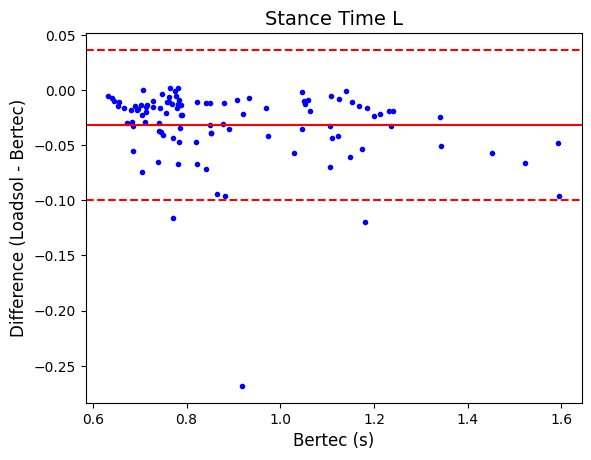

In [59]:
name = (bertec.iloc[:,4].name.replace("_", " "))

# Compute differences
difference = loadsol.iloc[:,4]-bertec.iloc[:,4] # Loadsol data - Bertec data

# Scatter plot
plt.scatter(bertec.iloc[:,4], difference, marker='.', c='blue')

# Calculate mean and SD
mean = statistics.mean(difference)
lower_sd = mean-1.96*(statistics.stdev(difference))
upper_sd = mean+1.96*(statistics.stdev(difference))

# Plot mean and SD line
plt.axhline(upper_sd, color='red', linestyle='--')
plt.axhline(mean, color='red')
plt.axhline(lower_sd, color='red', linestyle='--')

# Plot text
plt.title(name, fontsize=14)
plt.xlabel('Bertec (s)', fontsize=12)
plt.ylabel('Difference (Loadsol - Bertec)', fontsize=12)
plt.show()

### All conditions

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.031752,-0.099825,0.036321,-0.1 - 0.04,Overall
1,Stance Time R,-0.033150,-0.125270,0.058969,-0.13 - 0.06,Overall
2,Stride Time L,-0.005281,-0.208179,0.197617,-0.21 - 0.2,Overall
3,Stride Time R,-0.006757,-0.235012,0.221498,-0.24 - 0.22,Overall
4,Cadence,0.551282,-11.590758,12.693323,-11.59 - 12.69,Overall
5,Step Length,-0.004780,-0.104790,0.095230,-0.1 - 0.1,Overall
6,Impact Peak Force L,-90.945651,-426.681041,244.789739,-426.68 - 244.79,Overall
7,Impact Peak Force R,-55.800990,-323.186570,211.584589,-323.19 - 211.58,Overall
8,Active Peak Force L,23.789992,-127.225852,174.805835,-127.23 - 174.81,Overall
9,Active Peak Force R,23.957387,-175.901799,223.816573,-175.9 - 223.82,Overall


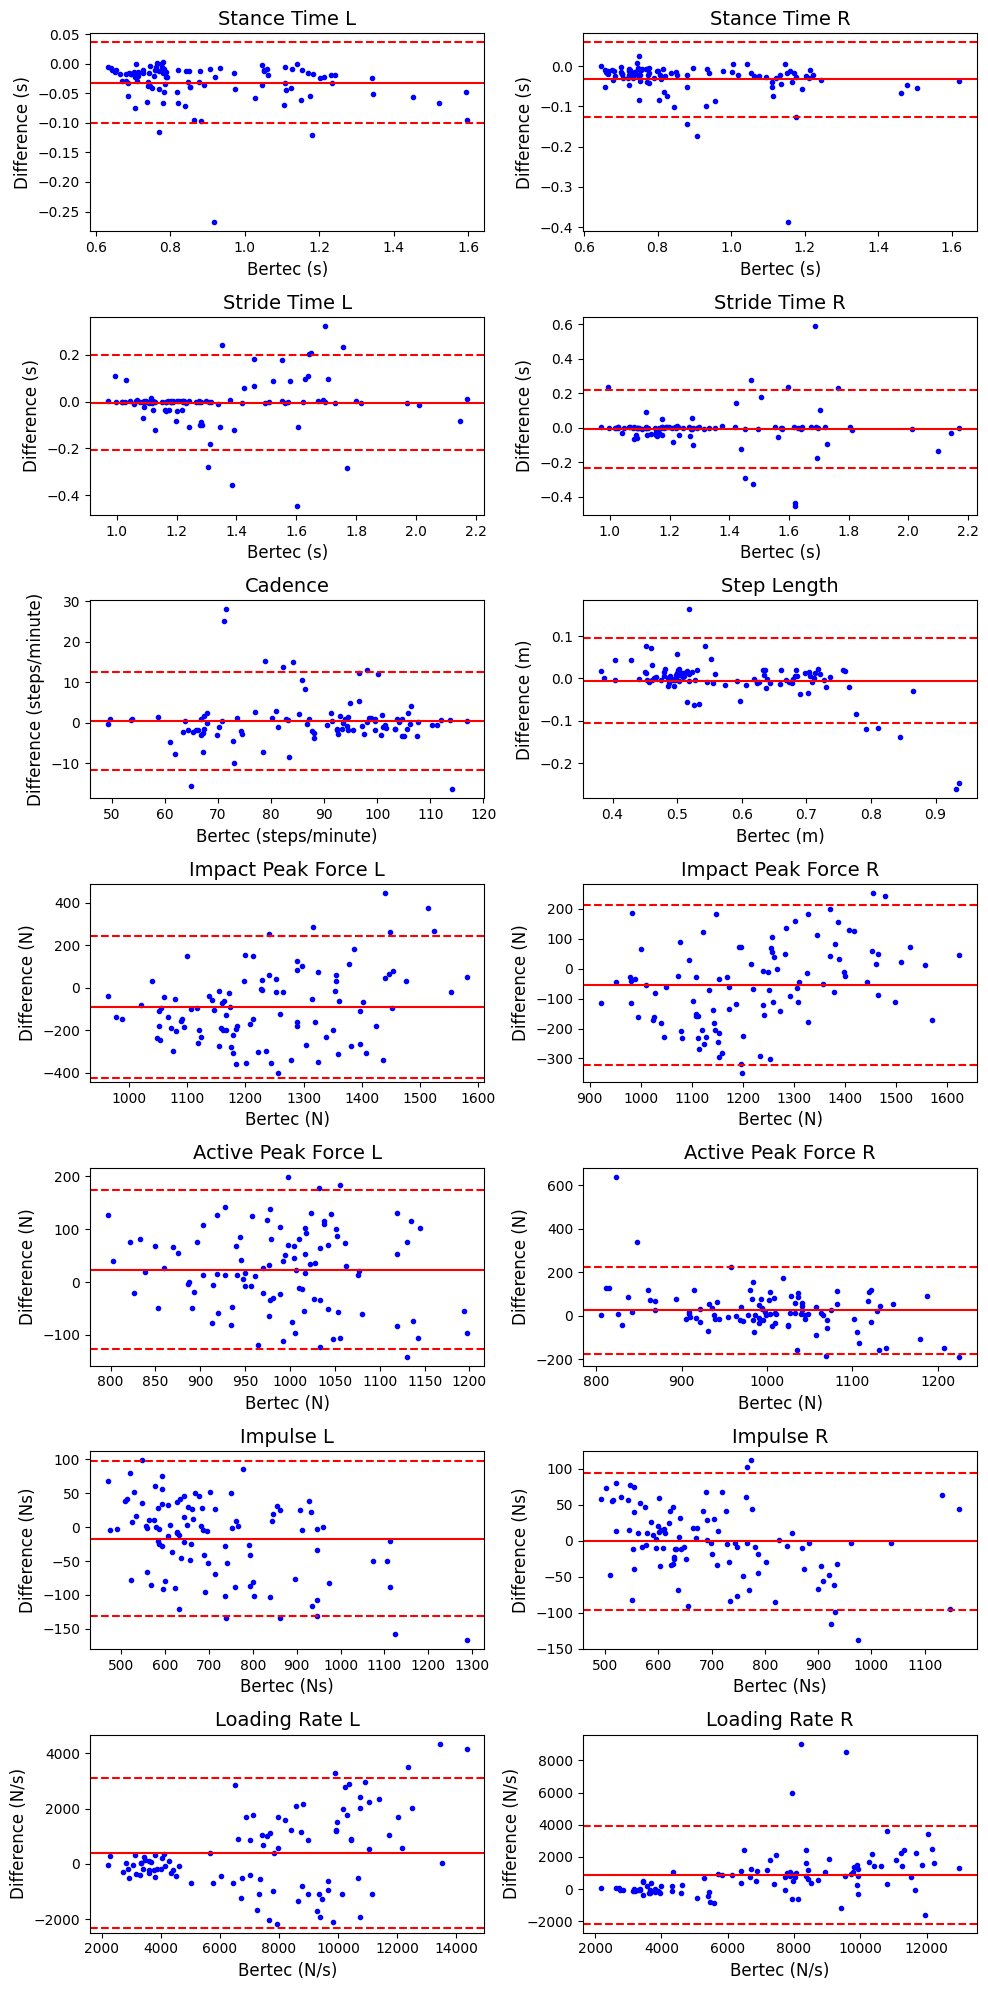

In [60]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot(loadsol, bertec, 'overall')

df_all_condition = put_in_df("Overall")
df_all_condition

### 25kg flat

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.008637,-0.023261,0.005986,-0.02 - 0.01,Flat 25kg
1,Stance Time R,-0.011370,-0.023424,0.000684,-0.02 - 0.0,Flat 25kg
2,Step Time L,0.000722,-0.011959,0.013402,-0.01 - 0.01,Flat 25kg
3,Step Time R,-0.004163,-0.022288,0.013962,-0.02 - 0.01,Flat 25kg
4,Cadence,-0.273430,-3.799528,3.252668,-3.8 - 3.25,Flat 25kg
5,Step Length,0.000486,-0.028749,0.029721,-0.03 - 0.03,Flat 25kg
6,Impact Peak Force L,-45.756385,-280.112065,188.599295,-280.11 - 188.6,Flat 25kg
7,Impact Peak Force R,-25.911108,-192.915567,141.093350,-192.92 - 141.09,Flat 25kg
8,Active Peak Force L,51.553886,-63.466825,166.574598,-63.47 - 166.57,Flat 25kg
9,Active Peak Force R,17.638096,-155.341154,190.617346,-155.34 - 190.62,Flat 25kg


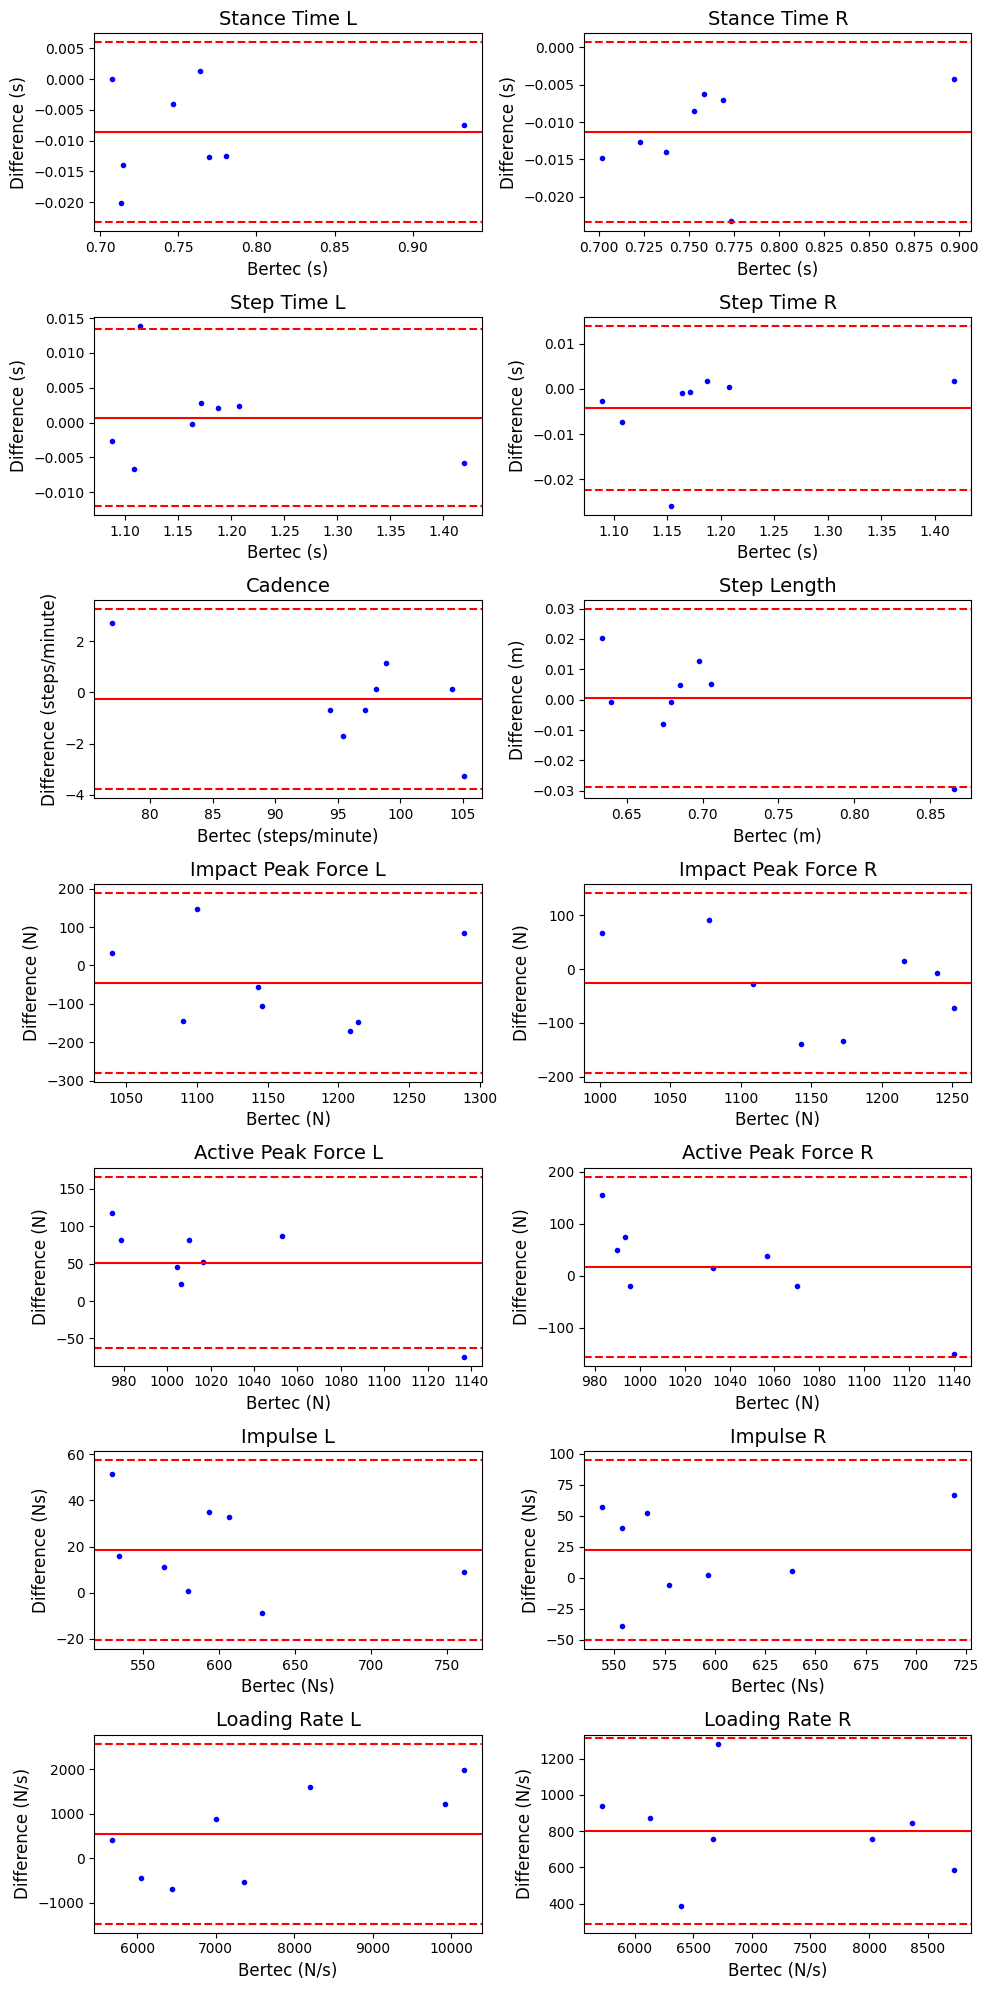

In [143]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_25kg_flat,bertec_25kg_flat, "flat_25kg")
df_flat_25kg = put_in_df("Flat 25kg")
df_flat_25kg

### 25kg incline

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.034032,-0.094086,0.026022,-0.09 - 0.03,Incline 25kg
1,Stance Time R,-0.026779,-0.052484,-0.001075,-0.05 - -0.0,Incline 25kg
2,Step Time L,-0.003154,-0.078020,0.071711,-0.08 - 0.07,Incline 25kg
3,Step Time R,0.012672,-0.093098,0.118443,-0.09 - 0.12,Incline 25kg
4,Cadence,-2.307923,-7.713706,3.097859,-7.71 - 3.1,Incline 25kg
5,Step Length,0.015372,-0.024885,0.055629,-0.02 - 0.06,Incline 25kg
6,Impact Peak Force L,-183.389718,-328.378727,-38.400708,-328.38 - -38.4,Incline 25kg
7,Impact Peak Force R,-188.598111,-336.492140,-40.704083,-336.49 - -40.7,Incline 25kg
8,Active Peak Force L,4.217339,-121.482460,129.917138,-121.48 - 129.92,Incline 25kg
9,Active Peak Force R,-2.889138,-143.159160,137.380885,-143.16 - 137.38,Incline 25kg


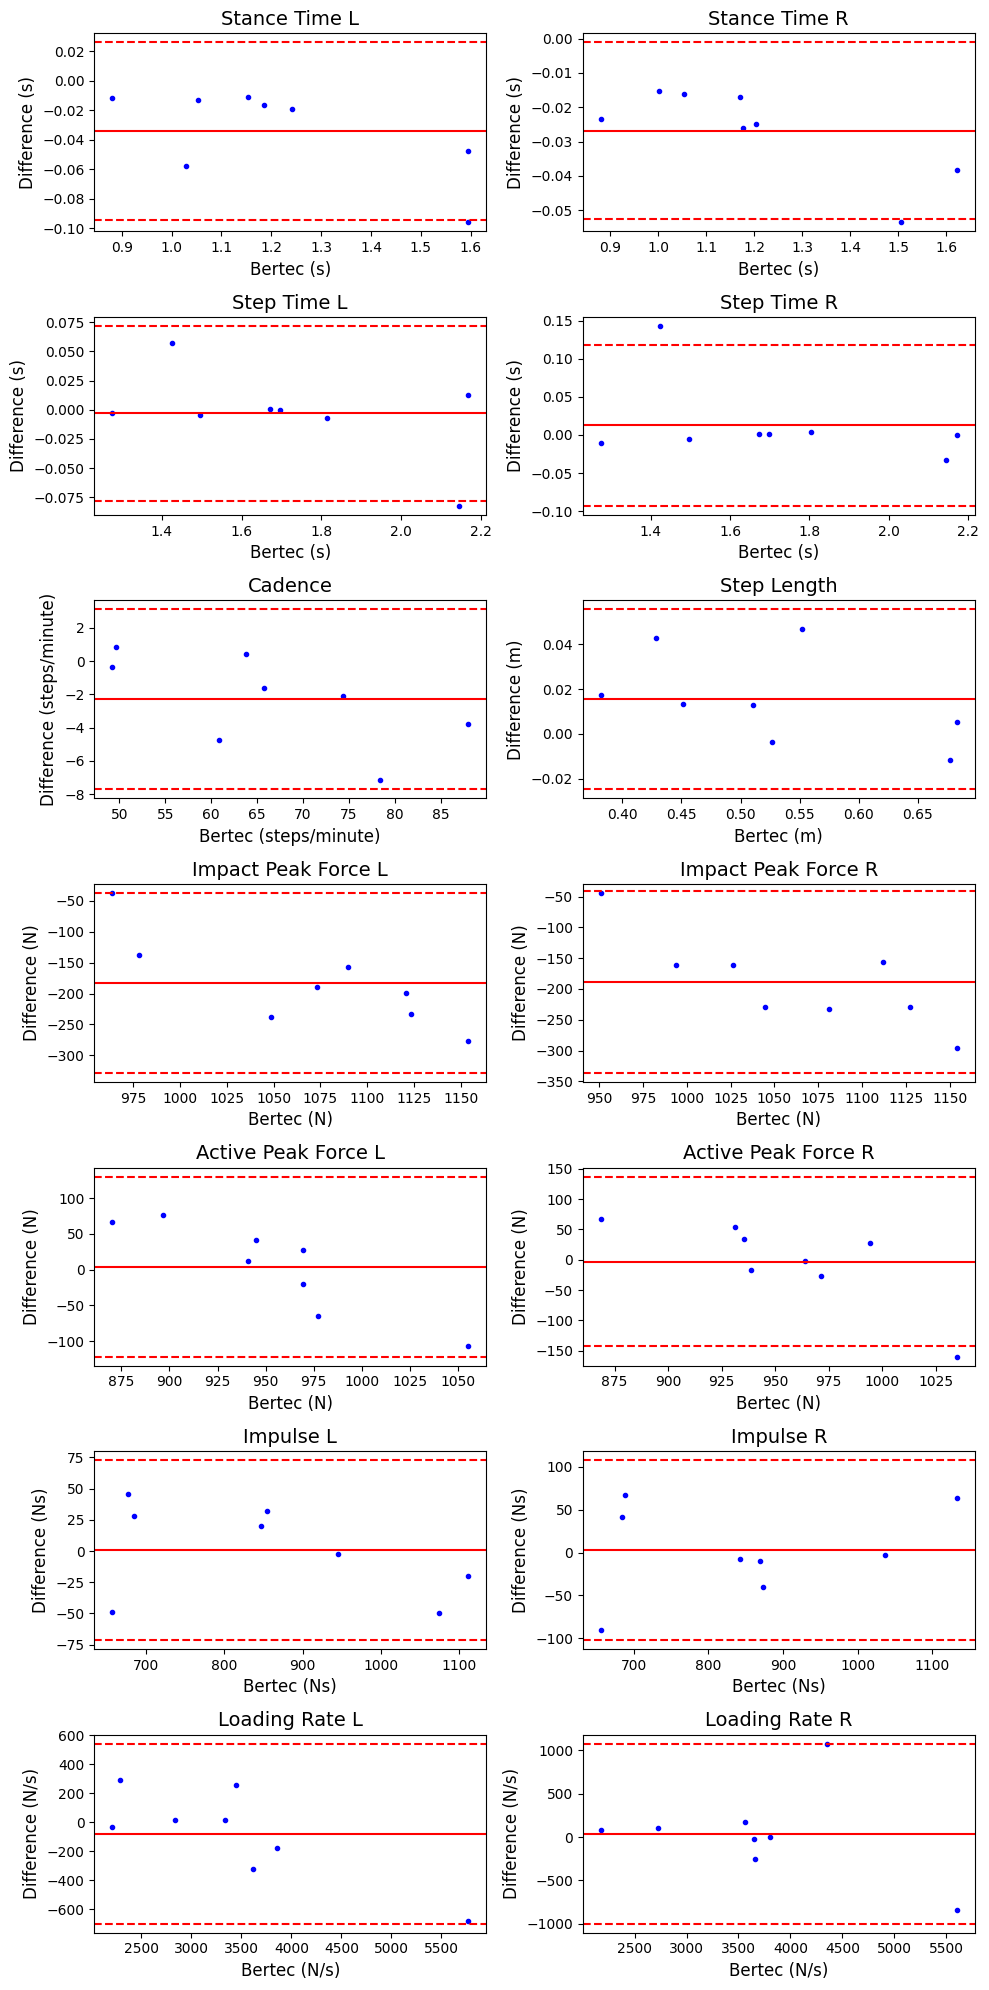

In [144]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_25kg_incline,bertec_25kg_incline, "incline_25kg")
df_incline_25kg = put_in_df("Incline 25kg")
df_incline_25kg

### 25kg decline

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.037639,-0.094410,0.019132,-0.09 - 0.02,Decline 25kg
1,Stance Time R,-0.015407,-0.044650,0.013837,-0.04 - 0.01,Decline 25kg
2,Step Time L,-0.028614,-0.133212,0.075984,-0.13 - 0.08,Decline 25kg
3,Step Time R,-0.016876,-0.084722,0.050970,-0.08 - 0.05,Decline 25kg
4,Cadence,1.707885,-4.804937,8.220707,-4.8 - 8.22,Decline 25kg
5,Step Length,-0.011655,-0.051056,0.027745,-0.05 - 0.03,Decline 25kg
6,Impact Peak Force L,29.234019,-321.504665,379.972702,-321.5 - 379.97,Decline 25kg
7,Impact Peak Force R,70.326934,-96.775348,237.429216,-96.78 - 237.43,Decline 25kg
8,Active Peak Force L,-2.009311,-99.212198,95.193577,-99.21 - 95.19,Decline 25kg
9,Active Peak Force R,14.080978,-110.513008,138.674964,-110.51 - 138.67,Decline 25kg


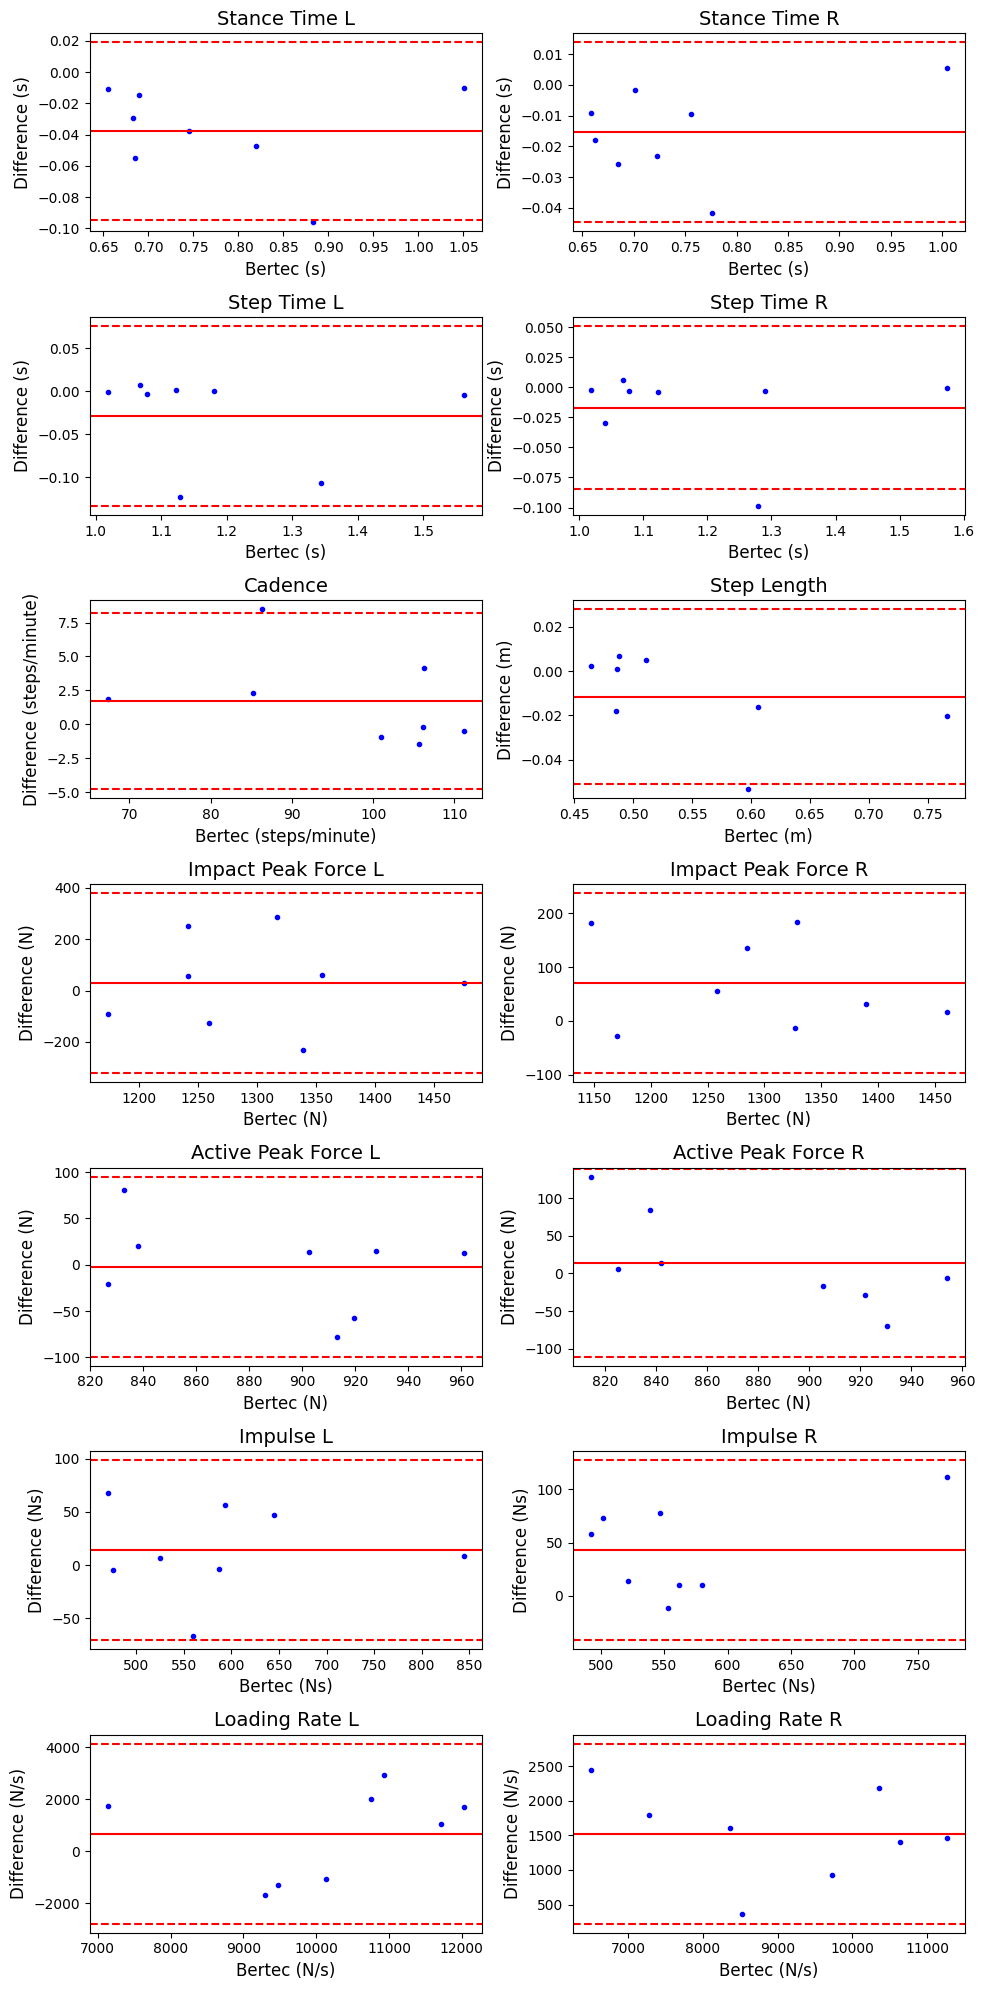

In [145]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_25kg_decline,bertec_25kg_decline, "decline_25kg")
df_decline_25kg = put_in_df("Decline 25kg")
df_decline_25kg

### 35kg flat

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.008928,-0.020729,0.002873,-0.02 - 0.0,Flat 35kg
1,Stance Time R,-0.016133,-0.072239,0.039974,-0.07 - 0.04,Flat 35kg
2,Step Time L,-0.026986,-0.102325,0.048354,-0.1 - 0.05,Flat 35kg
3,Step Time R,-0.047901,-0.252472,0.156671,-0.25 - 0.16,Flat 35kg
4,Cadence,1.422899,-7.232808,10.078606,-7.23 - 10.08,Flat 35kg
5,Step Length,-0.010657,-0.078919,0.057605,-0.08 - 0.06,Flat 35kg
6,Impact Peak Force L,-28.746112,-243.408059,185.915834,-243.41 - 185.92,Flat 35kg
7,Impact Peak Force R,-1.140106,-132.841531,130.561319,-132.84 - 130.56,Flat 35kg
8,Active Peak Force L,69.146325,-88.324311,226.616961,-88.32 - 226.62,Flat 35kg
9,Active Peak Force R,36.953764,-146.694299,220.601828,-146.69 - 220.6,Flat 35kg


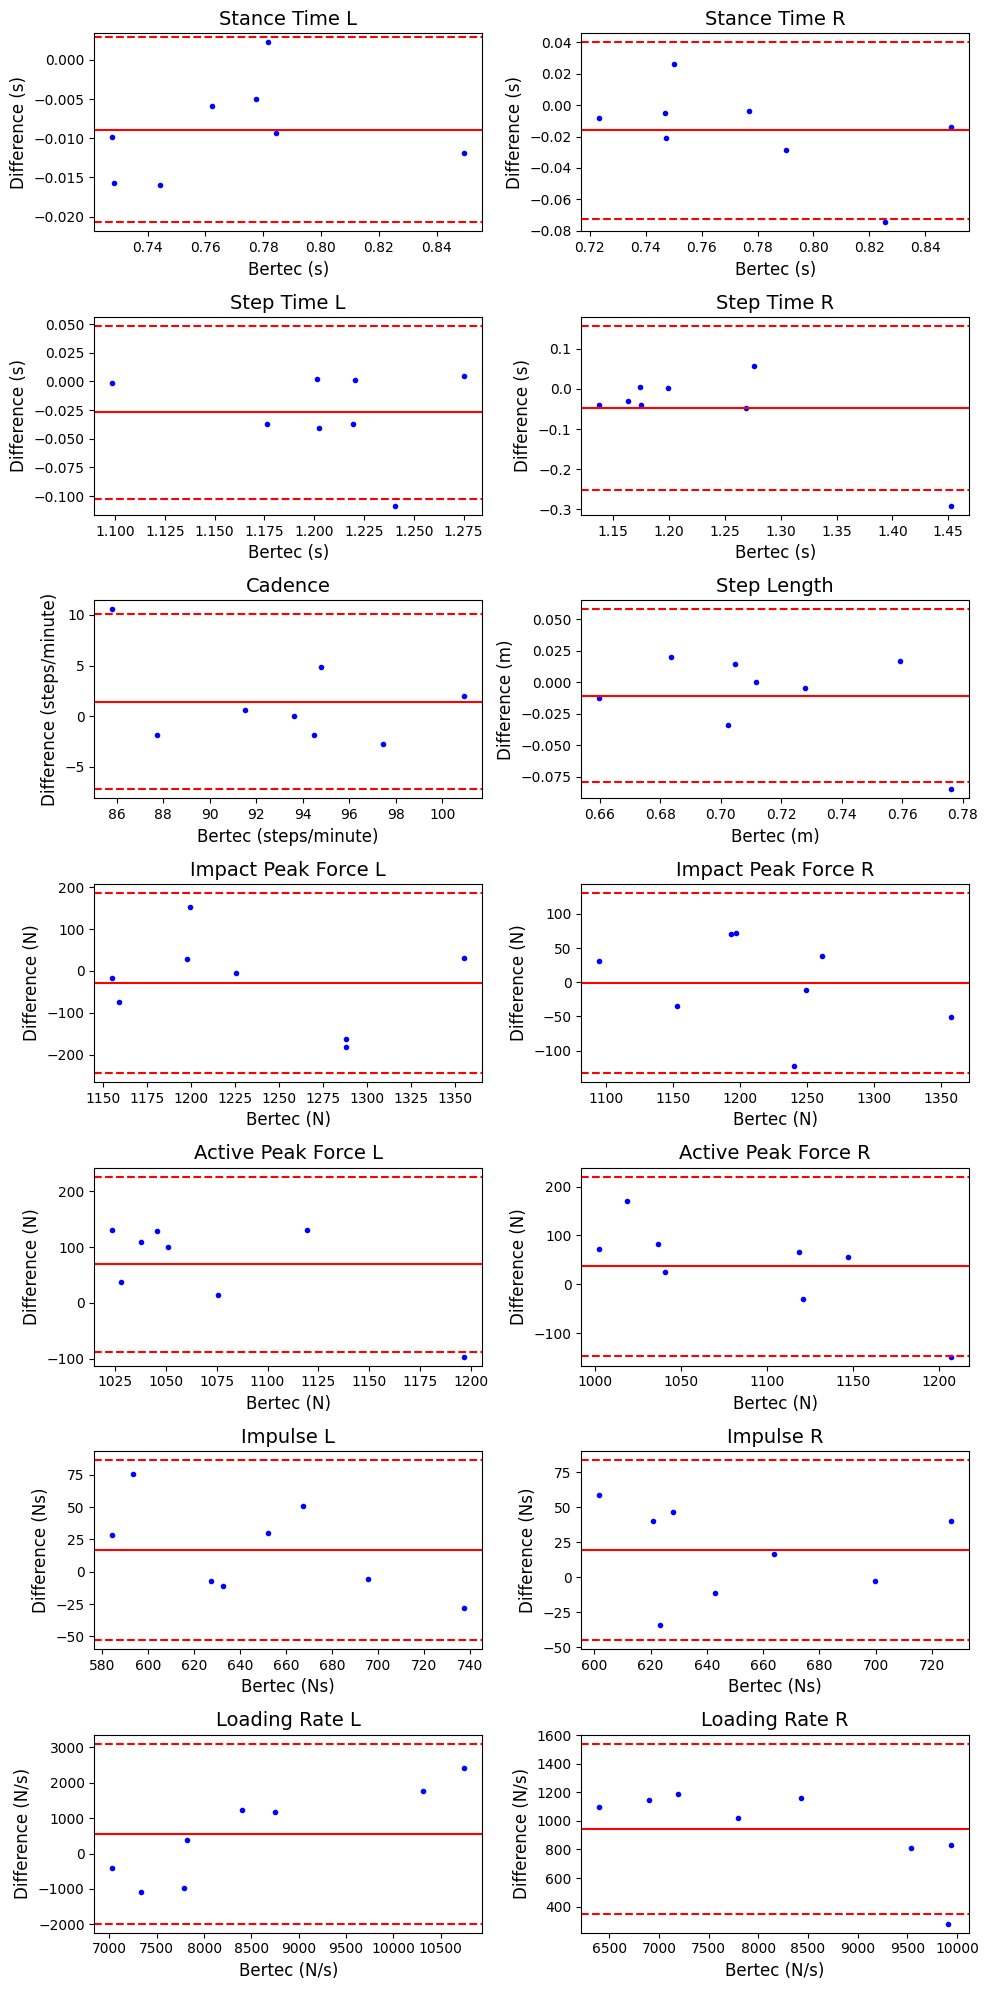

In [146]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_35kg_flat, bertec_35kg_flat, "flat_35kg")
df_flat_35kg = put_in_df("Flat 35kg")
df_flat_35kg

### 35kg incline

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.026221,-0.075359,0.022917,-0.08 - 0.02,Incline 35kg
1,Stance Time R,-0.014967,-0.048446,0.018511,-0.05 - 0.02,Incline 35kg
2,Step Time L,0.049978,-0.205626,0.305582,-0.21 - 0.31,Incline 35kg
3,Step Time R,0.101536,-0.334943,0.538015,-0.33 - 0.54,Incline 35kg
4,Cadence,-2.900375,-13.530304,7.729554,-13.53 - 7.73,Incline 35kg
5,Step Length,0.027104,-0.083822,0.138029,-0.08 - 0.14,Incline 35kg
6,Impact Peak Force L,-137.773967,-268.510739,-7.037195,-268.51 - -7.04,Incline 35kg
7,Impact Peak Force R,-134.049349,-290.038922,21.940225,-290.04 - 21.94,Incline 35kg
8,Active Peak Force L,43.298156,-134.311064,220.907375,-134.31 - 220.91,Incline 35kg
9,Active Peak Force R,14.206129,-151.182258,179.594517,-151.18 - 179.59,Incline 35kg


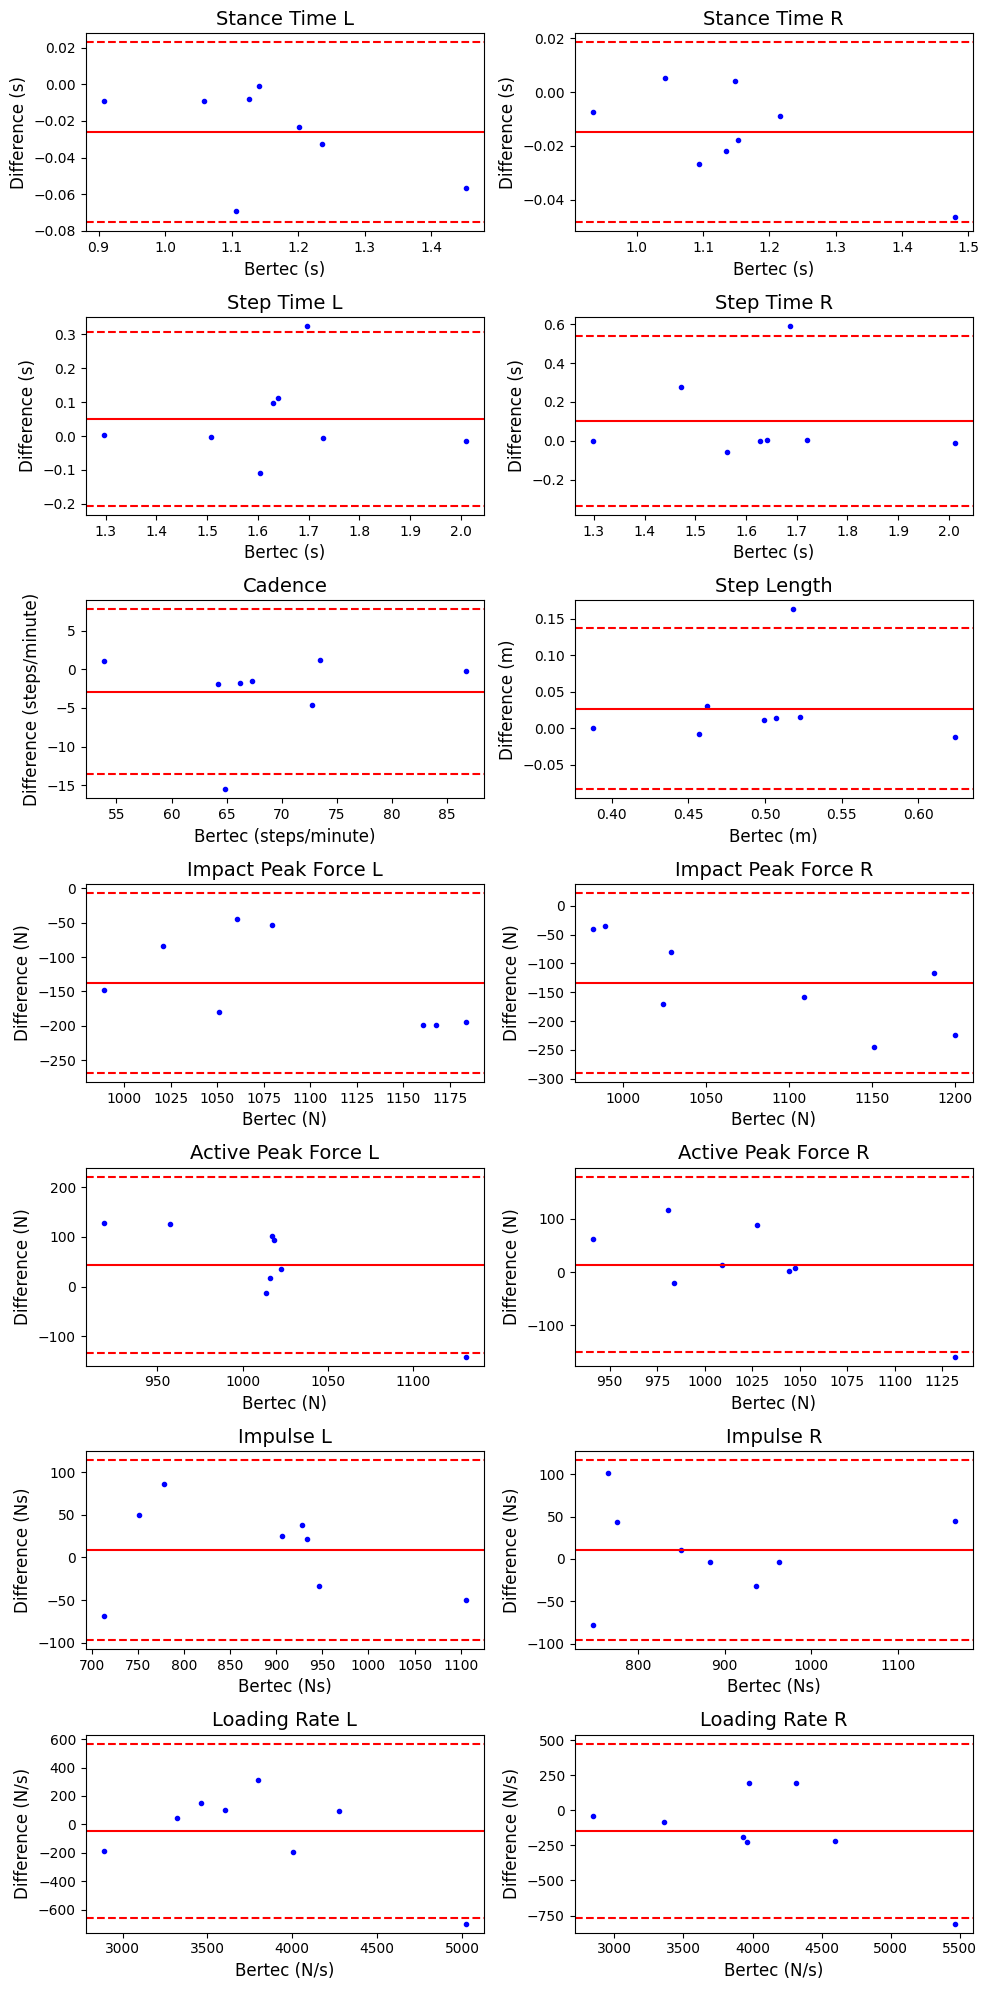

In [147]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_35kg_incline, bertec_35kg_incline, "incline_35kg")
df_incline_35kg = put_in_df("Incline 35kg")
df_incline_35kg

### 35kg decline

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.027393,-0.098692,0.043906,-0.1 - 0.04,Decline 35kg
1,Stance Time R,-0.021351,-0.074701,0.031999,-0.07 - 0.03,Decline 35kg
2,Step Time L,-0.022792,-0.240921,0.195338,-0.24 - 0.2,Decline 35kg
3,Step Time R,0.029288,-0.134225,0.192801,-0.13 - 0.19,Decline 35kg
4,Cadence,-0.235132,-15.879292,15.409028,-15.88 - 15.41,Decline 35kg
5,Step Length,0.000481,-0.073062,0.074024,-0.07 - 0.07,Decline 35kg
6,Impact Peak Force L,43.798304,-356.233874,443.830481,-356.23 - 443.83,Decline 35kg
7,Impact Peak Force R,125.779379,-21.948460,273.507219,-21.95 - 273.51,Decline 35kg
8,Active Peak Force L,12.579194,-70.344801,95.503189,-70.34 - 95.5,Decline 35kg
9,Active Peak Force R,119.713510,-304.411657,543.838676,-304.41 - 543.84,Decline 35kg


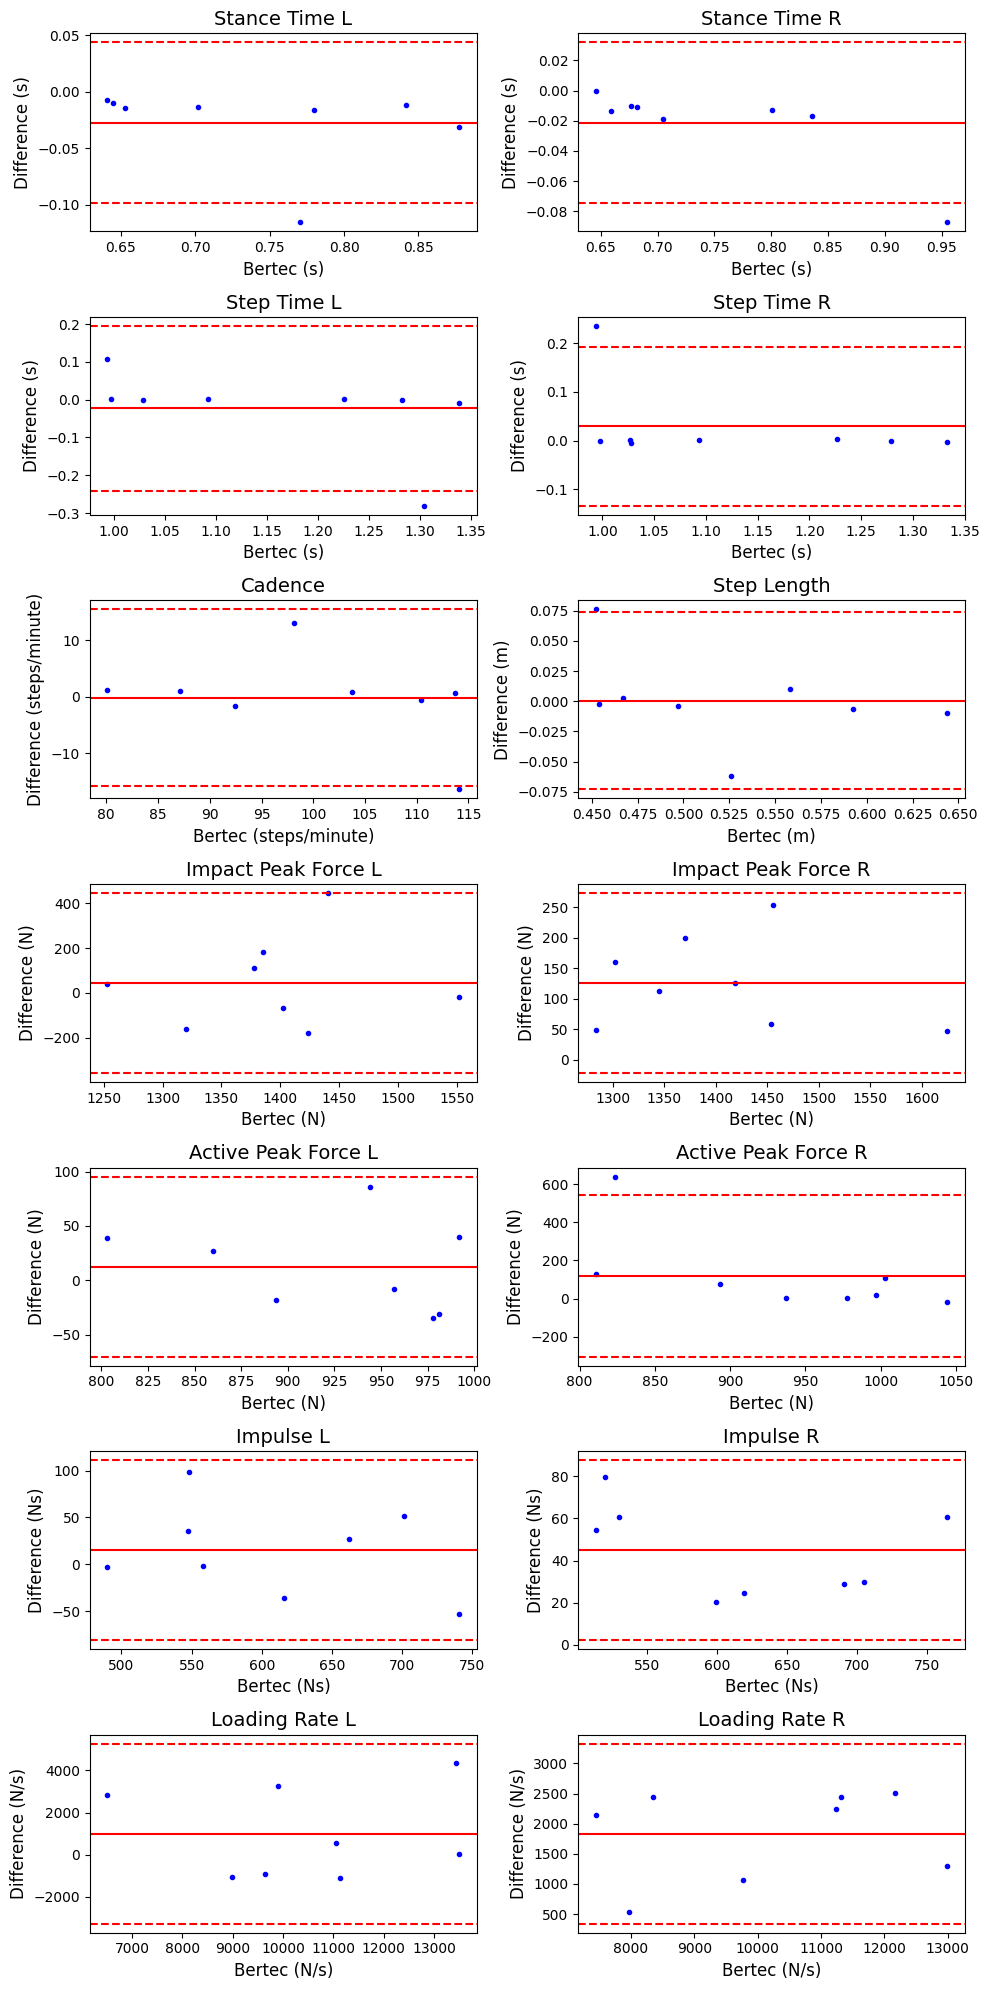

In [148]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_35kg_decline, bertec_35kg_decline, "decline_35kg")
df_decline_35kg = put_in_df("Decline 35kg")
df_decline_35kg

## All the dataframes

In [149]:
df_all = pd.concat([df_flat_25kg, df_flat_35kg, df_incline_25kg, df_incline_35kg, df_decline_25kg, df_decline_35kg, df_all_condition])
df_all

,GRF variable,Bias,Lower bound,Upper bound,95% LoA,Condition
0,Stance Time L,-0.008637,-0.023261,0.005986,-0.02 - 0.01,Flat 25kg
1,Stance Time R,-0.011370,-0.023424,0.000684,-0.02 - 0.0,Flat 25kg
2,Step Time L,0.000722,-0.011959,0.013402,-0.01 - 0.01,Flat 25kg
3,Step Time R,-0.004163,-0.022288,0.013962,-0.02 - 0.01,Flat 25kg
4,Cadence,-0.273430,-3.799528,3.252668,-3.8 - 3.25,Flat 25kg
...,...,...,...,...,...,...
9,Active Peak Force R,23.957387,-175.901799,223.816573,-175.9 - 223.82,Overall
10,Impulse L,-17.220797,-131.693556,97.251963,-131.69 - 97.25,Overall
11,Impulse R,-1.231463,-96.567080,94.104153,-96.57 - 94.1,Overall
12,Loading Rate L,384.066042,-2334.380866,3102.512951,-2334.38 - 3102.51,Overall


In [150]:
# Export to excel
with pd.ExcelWriter("blandaltman_stats_bertec as xaxis_8may.xlsx") as writer:
    df_all.to_excel(writer)

## Plot one variable in one figure

In [62]:
def variable_plot(left_column_string: str, right_column_string: str,):
  name_column1 = left_column_string
  name_column2 = right_column_string

  if name_column1 == "Stance_Time_L" or name_column1 == "Step_Time_L":
    name_xlabel, name_xlabel2  = "Bertec (s)", "Bertec (s)"
    name_ylabel, name_ylabel2 = "Difference (s)", "Difference (s)"
  elif name_column1 == "Cadence" and name_column2 == "Step_Length":
    name_xlabel = "Bertec (steps/minute)"
    name_ylabel = "Difference (steps/minute)"
    name_xlabel2 = "Bertec (m)"
    name_ylabel2 = "Difference (m)"
  elif name_column1 == "Impact_Peak_Force_L" or name_column1 == "Active_Peak_Force_L":
    name_xlabel, name_xlabel2 = "Bertec (N)", "Bertec (N)"
    name_ylabel, name_ylabel2 = "Difference (N)", "Difference (N)"
  elif name_column1 == "Loading_Rate_L":
    name_xlabel, name_xlabel2 = "Bertec (N/s)", "Bertec (N/s)"
    name_ylabel, name_ylabel2 = "Difference (N/s)", "Difference (N/s)"
  elif name_column1 == "Impulse_L":
    name_xlabel, name_xlabel2 = "Bertec (Ns)", "Bertec (Ns)"
    name_ylabel, name_ylabel2 = "Difference (Ns)", "Difference (Ns)"

  # Initialise the subplot function using number of rows and columns
  figure, axis = plt.subplots(6, 2, figsize=(15,15))

  #
  difference = loadsol_25kg_flat[name_column1] - bertec_25kg_flat[name_column1] # Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[0, 0].scatter(bertec_25kg_flat[name_column1], difference, marker='.', c='blue')
  axis[0, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[0, 0].axhline(mean, color='red')
  axis[0, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  axis[0, 0].set_title(name_column1.replace("_", " "), fontsize=14)
  axis[0, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[0, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_35kg_flat[name_column1] - bertec_35kg_flat[name_column1] # Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[1, 0].scatter(bertec_25kg_flat[name_column1], difference, marker='.', c='blue')
  axis[1, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[1, 0].axhline(mean, color='red')
  axis[1, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[1, 0].set_title(name, fontsize=14)
  axis[1, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[1, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_25kg_flat[name_column2] - bertec_25kg_flat[name_column2]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[0, 1].scatter(bertec_25kg_flat[name_column2], difference, marker='.', c='blue')
  axis[0, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[0, 1].axhline(mean, color='red')
  axis[0, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  axis[0, 1].set_title(name_column2.replace("_", " "), fontsize=14)
  axis[0, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[0, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_35kg_flat[name_column2] - bertec_35kg_flat[name_column2]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[1, 1].scatter(bertec_35kg_flat[name_column2], difference, marker='.', c='blue')
  axis[1, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[1, 1].axhline(mean, color='red')
  axis[1, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[1, 1].set_title(name2, fontsize=14)
  axis[1, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[1, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_25kg_incline[name_column1] - bertec_25kg_incline[name_column1]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[2, 0].scatter(bertec_25kg_incline[name_column1], difference, marker='.', c='blue')
  axis[2, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[2, 0].axhline(mean, color='red')
  axis[2, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 0].set_title(name, fontsize=14)
  axis[2, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[2, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_35kg_incline[name_column1] - bertec_35kg_incline[name_column1] # Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[3, 0].scatter(bertec_35kg_incline[name_column1], difference, marker='.', c='blue')
  axis[3, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[3, 0].axhline(mean, color='red')
  axis[3, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 1].set_title(name, fontsize=14)
  axis[3, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[3, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_25kg_incline[name_column2] - bertec_25kg_incline[name_column2] # Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[2, 1].scatter(bertec_25kg_incline[name_column2], difference, marker='.', c='blue')
  axis[2, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[2, 1].axhline(mean, color='red')
  axis[2, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[2, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[2, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_35kg_incline[name_column2] - bertec_35kg_incline[name_column2]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[3, 1].scatter(bertec_35kg_incline[name_column2], difference, marker='.', c='blue')
  axis[3, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[3, 1].axhline(mean, color='red')
  axis[3, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[3, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[3, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_25kg_decline[name_column1] - bertec_25kg_decline[name_column1] # Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[4, 0].scatter(bertec_25kg_decline[name_column1], difference, marker='.', c='blue')
  axis[4, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[4, 0].axhline(mean, color='red')
  axis[4, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 0].set_title(name, fontsize=14)
  axis[4, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[4, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_35kg_decline[name_column1] - bertec_35kg_decline[name_column1]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[5, 0].scatter(bertec_35kg_decline[name_column1], difference, marker='.', c='blue')
  axis[5, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[5, 0].axhline(mean, color='red')
  axis[5, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 1].set_title(name, fontsize=14)
  axis[5, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[5, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_25kg_decline[name_column2] - bertec_25kg_decline[name_column2]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[4, 1].scatter(bertec_25kg_decline[name_column2], difference, marker='.', c='blue')
  axis[4, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[4, 1].axhline(mean, color='red')
  axis[4, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[4, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[4, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_35kg_decline[name_column2] - bertec_35kg_decline[name_column2]# Compute differences
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[5, 1].scatter(bertec_35kg_decline[name_column2], difference, marker='.', c='blue')
  axis[5, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[5, 1].axhline(mean, color='red')
  axis[5, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[5, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[5, 1].set_ylabel(name_ylabel2, fontsize=12)


  rows = ["Flat 25kg", "Flat 35kg", "Incline 25kg", "Incline 35kg", "Decline 25kg", "Decline 35kg"]
  pad=5
  for ax, row in zip(axis[:,0], rows):
      ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                  xycoords=ax.yaxis.label, textcoords='offset points',
                  size='large', ha='right', va='center')

  # Combine all the operations and display
  figure.tight_layout()
  figure.subplots_adjust(left=0.15)
  # plt.show()

  if name_column1 == "Stance_Time_L":
    file_to_save = "stance_time"
  elif name_column1 == "Step_Time_L":
    file_to_save = "step_time"
  elif name_column1 == "Cadence" and name_column2 == "Step_Length":
    file_to_save = "cadence_steplength"
  elif name_column1 == "Impact_Peak_Force_L" : 
    file_to_save = "impact_peak_force"
  elif name_column1 == "Active_Peak_Force_L":
    file_to_save = "active_peak_force"
  elif name_column1 == "Loading_Rate_L":
    file_to_save = "loading_rate"
  elif name_column1 == "Impulse_L":
    file_to_save = "impulse"

  # plt.savefig(f"{file_to_save}.png")

### Stance Time

In [ ]:
variable_plot("Stance_Time_L", "Stance_Time_R")

### Step Time

In [ ]:
variable_plot("Step_Time_L", "Step_Time_R")

### Cadence and step length

In [ ]:
variable_plot("Cadence", "Step_Length")

### Impact peak force

In [ ]:
variable_plot("Impact_Peak_Force_L", "Impact_Peak_Force_R")

### Active peak force

In [ ]:
variable_plot("Active_Peak_Force_L", "Active_Peak_Force_R")

### Impulse

In [ ]:
variable_plot("Impulse_L", "Impulse_R")

### Loading rate

In [ ]:
variable_plot("Loading_Rate_L", "Loading_Rate_R")

# Plot x-axis as mean of bertec and loadsol

In [ ]:
# Write a function to plot all variables
def get_plot_mean(df_loadsol, df_bertec, plot_name):
    count = 1
    fig, axes = plt.subplots(7, 2, figsize=(10,20))
    for i in range(4, 18):
        difference = df_loadsol.iloc[:,i]-df_bertec.iloc[:,i] # Loadsol data - Bertec data
        mean_device = (df_loadsol.iloc[:,i] + df_bertec.iloc[:,i]) / 2

        # Scatter plot
        axes[int((i-4)/2), (i-4)%2].scatter(mean_device, difference, marker='.', c='blue') # x-axis is Bertec data

        # Calculate mean and SD
        mean_difference = statistics.mean(difference)
        lower_bound = mean_difference-1.96*(statistics.stdev(difference))
        upper_bound = mean_difference+1.96*(statistics.stdev(difference))

        # Store data in list
        mean_list.append(mean_difference)
        lower_bound_list.append(lower_bound)
        upper_bound_list.append(upper_bound)

        # Plot mean and SD line
        axes[int((i-4)/2), (i-4)%2].axhline(lower_bound, color='red', linestyle='--')
        axes[int((i-4)/2), (i-4)%2].axhline(mean_difference, color='red')
        axes[int((i-4)/2), (i-4)%2].axhline(upper_bound, color='red', linestyle='--')

        if count <= 4: # Stance time and step time
            # Plot axis
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (s)', fontsize=12)
        elif count <= 5: # cadence
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (steps/minute)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (steps/minute)', fontsize=12)
        elif count <= 6: # step length
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (m)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (m)', fontsize=12)
        elif count <= 10: # peak impact and active force
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (N)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N)', fontsize=12)
        elif count <= 12: # Impulse
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (Ns)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (Ns)', fontsize=12)
        elif count <= 14: # Loading rate
            axes[int((i-4)/2), (i-4)%2].set_title(grf_variable_name[i-4], fontsize=14)
            axes[int((i-4)/2), (i-4)%2].set_xlabel('Bertec (N/s)', fontsize=12)
            axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N/s)', fontsize=12)
        count += 1
    return plt.tight_layout(), plt.savefig(f"{plot_name}.png")

### Single plot

In [ ]:
name = (bertec.iloc[:,4].name.replace("_", " "))

# Compute differences
difference = bertec.iloc[:,4]-loadsol.iloc[:,4]
mean_device = (bertec.iloc[:,4] + loadsol.iloc[:,4]) / 2

# Scatter plot
plt.scatter(mean_device, difference, marker='.', c='blue')

# Calculate mean and SD
mean_difference = statistics.mean(difference)
lower_sd = mean_difference-1.96*(statistics.stdev(difference))
upper_sd = mean_difference+1.96*(statistics.stdev(difference))

# Plot mean and SD line
plt.axhline(upper_sd, color='red', linestyle='--')
plt.axhline(mean_difference, color='red')
plt.axhline(lower_sd, color='red', linestyle='--')

# Plot text
plt.title(name, fontsize=14)
plt.xlabel('Mean of Loadsol and Bertec', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

### All conditions

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot_mean(loadsol, bertec, 'overall')

In [ ]:
grf_variable_name = []
mean_list = []
lower_sd_list = []
upper_sd_list = []

fig2, axes = plt.subplots(7, 2, figsize=(10,20))

count = 1

for i in range(4, 20):
    # Get string name
    name = (bertec.iloc[:,i].name.replace("_", " "))
    grf_variable_name.append(name)

    # Compute differences
    difference = bertec.iloc[:,i]-loadsol.iloc[:,i]
    mean_device = (bertec.iloc[:,i] + loadsol.iloc[:,i]) / 2

    # Scatter plot
    axes[int((i-4)/2), (i-4)%2].scatter(mean_device, difference, marker='.', c='blue')

    # Calculate mean and SD
    mean_difference = statistics.mean(difference)
    lower_sd = mean_difference-1.96*(statistics.stdev(difference))
    upper_sd = mean_difference+1.96*(statistics.stdev(difference))

    # Store data in list
    mean_list.append(mean_difference)
    lower_sd_list.append(lower_sd)
    upper_sd_list.append(upper_sd)

    # Plot mean and SD line
    axes[int((i-4)/2), (i-4)%2].axhline(upper_sd, color='red', linestyle='--')
    axes[int((i-4)/2), (i-4)%2].axhline(mean_difference, color='red')
    axes[int((i-4)/2), (i-4)%2].axhline(lower_sd, color='red', linestyle='--')

    # Plot axis
    if count <= 4:
        # Plot axis
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (s)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (s)', fontsize=12)
    elif count <= 8:
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (N)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N)', fontsize=12)
    elif count <= 11: # impulse and loading rate
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (Ns)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (Ns)', fontsize=12)
    elif count <= 12:
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (N/s)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (N/s)', fontsize=12)
    elif count <= 13:
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (steps/minute)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (steps/minute)', fontsize=12)
    elif count <= 14:
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (Hz)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (Hz)', fontsize=12)
    elif count <= 16:
        axes[int((i-4)/2), (i-4)%2].set_title(name, fontsize=14)
        axes[int((i-4)/2), (i-4)%2].set_xlabel('Mean of Bertec and Loadsol (m)', fontsize=12)
        axes[int((i-4)/2), (i-4)%2].set_ylabel('Difference (m)', fontsize=12)
    count += 1

plt.tight_layout()
# plt.show()

# Set to dictionary and dataframe
d = {'GRF variable': grf_variable_name, 'Mean': mean_list, 'Lower SD': lower_sd_list, 'Upper SD':upper_sd_list}
df_all_condition = pd.DataFrame(d)
df_all_condition["LoA"] = df_all_condition["Lower SD"].round(2).astype(str) + " - " + df_all_condition["Upper SD"].round(2).astype(str)
df_all_condition["Condition"] = "Overall"
df_all_condition

# plt.savefig("overall.png")

### 25kg flat

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []

get_plot_mean(loadsol_25kg_flat,bertec_25kg_flat, "flat_25kg")

### 25kg incline

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_25kg_incline,bertec_25kg_incline, "incline_25kg")

### 25kg decline

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_25kg_decline,bertec_25kg_decline, "decline_25kg")

### 35kg flat

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_35kg_flat, bertec_35kg_flat, "flat_35kg")

### 35kg incline

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_35kg_incline, bertec_35kg_incline, "incline_35kg")

### 35kg decline

In [ ]:
mean_list = []
lower_bound_list = []
upper_bound_list = []
get_plot(loadsol_35kg_decline, bertec_35kg_decline, "decline_35kg")

## Plotting one variable in one figure

In [ ]:
def variable_plot_mean(left_column_string: str, right_column_string: str,):
  name_column1 = left_column_string
  name_column2 = right_column_string

  if name_column1 == "Stance_Time_L" or name_column1 == "Step_Time_L":
    name_xlabel, name_xlabel2  = "Bertec (s)", "Bertec (s)"
    name_ylabel, name_ylabel2 = "Difference (s)", "Difference (s)"
  elif name_column1 == "Cadence" and name_column2 == "Step_Length":
    name_xlabel = "Bertec (steps/minute)"
    name_ylabel = "Difference (steps/minute)"
    name_xlabel2 = "Bertec (m)"
    name_ylabel2 = "Difference (m)"
  elif name_column1 == "Impact_Peak_Force_L" or name_column1 == "Active_Peak_Force_L":
    name_xlabel, name_xlabel2 = "Bertec (N)", "Bertec (N)"
    name_ylabel, name_ylabel2 = "Difference (N)", "Difference (N)"
  elif name_column1 == "Loading_Rate_L":
    name_xlabel, name_xlabel2 = "Bertec (N/s)", "Bertec (N/s)"
    name_ylabel, name_ylabel2 = "Difference (N/s)", "Difference (N/s)"
  elif name_column1 == "Impulse_L":
    name_xlabel, name_xlabel2 = "Bertec (Ns)", "Bertec (Ns)"
    name_ylabel, name_ylabel2 = "Difference (Ns)", "Difference (Ns)"

  # Initialise the subplot function using number of rows and columns
  figure, axis = plt.subplots(6, 2, figsize=(15,15))

  #
  difference = loadsol_25kg_flat[name_column1] - bertec_25kg_flat[name_column1] # Compute differences
  mean_devices = (loadsol_25kg_flat[name_column1] + bertec_25kg_flat[name_column1]) / 2
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[0, 0].scatter(mean_devices, difference, marker='.', c='blue')
  axis[0, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[0, 0].axhline(mean, color='red')
  axis[0, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  axis[0, 0].set_title(name_column1.replace("_", " "), fontsize=14)
  axis[0, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[0, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_35kg_flat[name_column1] - bertec_35kg_flat[name_column1] # Compute differences
  mean_devices = (loadsol_35kg_flat[name_column1] + bertec_35kg_flat[name_column1]) / 2
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[1, 0].scatter(mean_devices, difference, marker='.', c='blue')
  axis[1, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[1, 0].axhline(mean, color='red')
  axis[1, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[1, 0].set_title(name, fontsize=14)
  axis[1, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[1, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_25kg_flat[name_column2] - bertec_25kg_flat[name_column2]# Compute differences
  mean_devices = (loadsol_25kg_flat[name_column2] + bertec_25kg_flat[name_column2]) / 2
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[0, 1].scatter(mean_devices, difference, marker='.', c='blue')
  axis[0, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[0, 1].axhline(mean, color='red')
  axis[0, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  axis[0, 1].set_title(name_column2.replace("_", " "), fontsize=14)
  axis[0, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[0, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_35kg_flat[name_column2] - bertec_35kg_flat[name_column2]# Compute differences
  mean_devices = (loadsol_35kg_flat[name_column2] + bertec_35kg_flat[name_column2]) / 2
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[1, 1].scatter(mean_devices, difference, marker='.', c='blue')
  axis[1, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[1, 1].axhline(mean, color='red')
  axis[1, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[1, 1].set_title(name2, fontsize=14)
  axis[1, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[1, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_25kg_incline[name_column1] - bertec_25kg_incline[name_column1]# Compute differences
  mean_devices = (loadsol_25kg_incline[name_column1] + bertec_25kg_incline[name_column1]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[2, 0].scatter(mean_devices, difference, marker='.', c='blue')
  axis[2, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[2, 0].axhline(mean, color='red')
  axis[2, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 0].set_title(name, fontsize=14)
  axis[2, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[2, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_35kg_incline[name_column1] - bertec_35kg_incline[name_column1] # Compute differences
  mean_devices = (loadsol_35kg_incline[name_column1] + bertec_35kg_incline[name_column1]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[3, 0].scatter(mean_devices, difference, marker='.', c='blue')
  axis[3, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[3, 0].axhline(mean, color='red')
  axis[3, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 1].set_title(name, fontsize=14)
  axis[3, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[3, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_25kg_incline[name_column2] - bertec_25kg_incline[name_column2] # Compute differences
  mean_devices = (loadsol_25kg_incline[name_column2] + bertec_25kg_incline[name_column2]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[2, 1].scatter(mean_devices, difference, marker='.', c='blue')
  axis[2, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[2, 1].axhline(mean, color='red')
  axis[2, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[2, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[2, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_35kg_incline[name_column2] - bertec_35kg_incline[name_column2]# Compute differences
  mean_devices = (loadsol_35kg_incline[name_column2] + bertec_35kg_incline[name_column2]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[3, 1].scatter(mean_devices, difference, marker='.', c='blue')
  axis[3, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[3, 1].axhline(mean, color='red')
  axis[3, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[3, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[3, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_25kg_decline[name_column1] - bertec_25kg_decline[name_column1] # Compute differences
  mean_devices = (loadsol_25kg_decline[name_column1] + bertec_25kg_decline[name_column1]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[4, 0].scatter(mean_devices, difference, marker='.', c='blue')
  axis[4, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[4, 0].axhline(mean, color='red')
  axis[4, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 0].set_title(name, fontsize=14)
  axis[4, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[4, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_35kg_decline[name_column1] - bertec_35kg_decline[name_column1]# Compute differences
  mean_devices = (loadsol_35kg_decline[name_column1] + bertec_35kg_decline[name_column1]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[5, 0].scatter(mean_devices, difference, marker='.', c='blue')
  axis[5, 0].axhline(upper_sd, color='red', linestyle='--')
  axis[5, 0].axhline(mean, color='red')
  axis[5, 0].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[2, 1].set_title(name, fontsize=14)
  axis[5, 0].set_xlabel(name_xlabel, fontsize=12)
  axis[5, 0].set_ylabel(name_ylabel, fontsize=12)

  #
  difference = loadsol_25kg_decline[name_column2] - bertec_25kg_decline[name_column2]# Compute differences
  mean_devices = (loadsol_25kg_decline[name_column2] + bertec_25kg_decline[name_column2]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[4, 1].scatter(mean_devices, difference, marker='.', c='blue')
  axis[4, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[4, 1].axhline(mean, color='red')
  axis[4, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[4, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[4, 1].set_ylabel(name_ylabel2, fontsize=12)

  #
  difference = loadsol_35kg_decline[name_column2] - bertec_35kg_decline[name_column2]# Compute differences
  mean_devices = (loadsol_35kg_decline[name_column2] + bertec_35kg_decline[name_column2]) / 2  
  # Calculate mean and SD
  mean = statistics.mean(difference)
  lower_sd = mean-1.96*(statistics.stdev(difference))
  upper_sd = mean+1.96*(statistics.stdev(difference))
  axis[5, 1].scatter(mean_devices, difference, marker='.', c='blue')
  axis[5, 1].axhline(upper_sd, color='red', linestyle='--')
  axis[5, 1].axhline(mean, color='red')
  axis[5, 1].axhline(lower_sd, color='red', linestyle='--')
  # Plot text
  # axis[3, 1].set_title(name2, fontsize=14)
  axis[5, 1].set_xlabel(name_xlabel2, fontsize=12)
  axis[5, 1].set_ylabel(name_ylabel2, fontsize=12)


  rows = ["Flat 25kg", "Flat 35kg", "Incline 25kg", "Incline 35kg", "Decline 25kg", "Decline 35kg"]
  pad=5
  for ax, row in zip(axis[:,0], rows):
      ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                  xycoords=ax.yaxis.label, textcoords='offset points',
                  size='large', ha='right', va='center')

  # Combine all the operations and display
  figure.tight_layout()
  figure.subplots_adjust(left=0.15)
  # plt.show()

  if name_column1 == "Stance_Time_L":
    file_to_save = "stance_time"
  elif name_column1 == "Step_Time_L":
    file_to_save = "step_time"
  elif name_column1 == "Cadence" and name_column2 == "Step_Length":
    file_to_save = "cadence_steplength"
  elif name_column1 == "Impact_Peak_Force_L" : 
    file_to_save = "impact_peak_force"
  elif name_column1 == "Active_Peak_Force_L":
    file_to_save = "active_peak_force"
  elif name_column1 == "Loading_Rate_L":
    file_to_save = "loading_rate"
  elif name_column1 == "Impulse_L":
    file_to_save = "impulse"

  plt.savefig(f"{file_to_save}.png")

### Stance time

In [ ]:
variable_plot_mean("Stance_Time_L", "Stance_Time_R")

### Step time

In [ ]:
variable_plot_mean("Step_Time_L", "Step_Time_R")

### Cadence and step length

In [ ]:
variable_plot_mean("Cadence", "Step_Length")

### Impact peak force

In [ ]:
variable_plot_mean("Impact_Peak_Force_L", "Impact_Peak_Force_R")

### Active peak force

In [ ]:
variable_plot_mean("Active_Peak_Force_L", "Active_Peak_Force_R")

### Impulse

In [ ]:
variable_plot_mean("Impulse_L", "Impulse_R")

### Loading rate

In [ ]:
variable_plot_mean("Loading_Rate_L", "Loading_Rate_R")

# Statistics

In [4]:
loadsol

,ID,Exo,Condition,Load,Stance_Time_L,Stance_Time_R,Step_Time_L,Step_Time_R,Cadence,Step_Length,Impact_Peak_Force_L,Impact_Peak_Force_R,Active_Peak_Force_L,Active_Peak_Force_R,Impulse_L,Impulse_R,Loading_Rate_L,Loading_Rate_R
0,P1,Non_Exo,Incline,35kg,0.898889,0.926071,1.298077,1.299259,86.554164,0.388196,841.603039,853.036300,989.947799,972.761954,644.141131,670.168104,4324.039861,4654.953268
1,P1,Non_Exo,Decline,35kg,0.638276,0.670690,1.026786,1.028929,109.839817,0.469775,1532.488378,1671.197559,875.255656,939.756504,556.387757,619.238926,13538.874002,14287.736180
2,P1,Non_Exo,Flat,35kg,0.717857,0.715357,1.097407,1.098148,102.889806,0.647294,1387.307539,1305.908475,1100.325505,1059.410251,621.304704,589.185271,12067.784095,10777.685643
3,P1,Non_Exo,Incline,25kg,0.869167,0.857273,1.272609,1.263810,84.210526,0.399000,884.172161,815.716411,948.888731,874.968026,608.068379,565.342807,5088.693579,4757.880087
4,P1,Non_Exo,Decline,25kg,0.644000,0.648966,1.017931,1.015714,110.715442,0.466060,1506.529842,1477.838830,805.217945,830.601222,531.499643,535.052822,12760.650204,12043.847062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,P8,Non_Exo,Decline,35kg,0.635000,0.645000,1.102222,1.229200,97.683156,0.528238,1488.105877,1462.413487,887.314500,1462.413487,583.612625,567.489960,11600.414658,8505.769795
98,P8,Non_Exo,Flat,35kg,0.775000,0.773077,1.182400,1.179200,92.621179,0.719058,1137.682867,1125.631282,1173.903840,1074.114067,682.240262,661.473508,8198.298356,7491.836074
99,P8,Non_Exo,Incline,25kg,1.499286,1.452000,2.063846,2.111429,50.467290,0.665778,811.363028,865.065420,912.278498,921.681383,1024.707361,1033.344553,2581.221225,2830.999806
100,P8,Non_Exo,Decline,25kg,0.786400,0.746667,1.237500,1.287391,87.468983,0.589923,1492.939755,1329.316313,915.854243,856.523363,690.902898,624.124581,13732.980271,9073.933659


In [15]:
pivot_df = pd.pivot_table(loadsol, index=['ID'], columns=['Exo', 'Condition', 'Load'])
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
new_df = pivot_df.reset_index()
pivot_df

,Active_Peak_Force_L_Exo_Decline_25kg,Active_Peak_Force_L_Exo_Decline_35kg,Active_Peak_Force_L_Exo_Flat_25kg,Active_Peak_Force_L_Exo_Flat_35kg,Active_Peak_Force_L_Exo_Incline_25kg,Active_Peak_Force_L_Exo_Incline_35kg,Active_Peak_Force_L_Non_Exo_Decline_25kg,Active_Peak_Force_L_Non_Exo_Decline_35kg,Active_Peak_Force_L_Non_Exo_Flat_25kg,Active_Peak_Force_L_Non_Exo_Flat_35kg,...,Step_Time_R_Non_Exo_Flat_25kg,Step_Time_R_Non_Exo_Flat_35kg,Step_Time_R_Non_Exo_Incline_25kg,Step_Time_R_Non_Exo_Incline_35kg,Step_Time_R_S Exo_Decline_25kg,Step_Time_R_S Exo_Decline_35kg,Step_Time_R_S Exo_Flat_25kg,Step_Time_R_S Exo_Flat_35kg,Step_Time_R_S Exo_Incline_25kg,Step_Time_R_S Exo_Incline_35kg
ID,,,,,,,,,,,,,,,,,,,,,
P1,882.590200,954.857037,1036.399915,1138.436374,940.547484,1036.975173,805.217945,875.255656,1062.286543,1100.325505,...,1.086429,1.098148,1.263810,1.299259,NaN,NaN,NaN,NaN,NaN,NaN
P2,853.308724,880.380792,1171.854335,1247.684850,926.482298,1019.475212,835.284614,948.743150,1139.468386,1250.413600,...,1.208077,1.220385,1.674706,1.627778,NaN,NaN,NaN,NaN,NaN,NaN
P3,887.969023,998.455914,1112.595264,1206.013932,967.058813,997.261841,862.120850,943.317828,1028.448223,1089.064998,...,1.128148,1.135172,1.809286,1.646111,NaN,NaN,NaN,NaN,NaN,NaN
P4,844.486787,992.806924,909.706610,1097.525044,910.439417,1000.061713,973.387538,950.523960,1060.151887,1064.841852,...,1.419524,1.333750,2.170769,2.002000,NaN,NaN,NaN,NaN,NaN,NaN
P5,1008.006930,1097.346600,1153.724670,1251.442080,1044.539370,1093.638420,942.221070,1031.492070,1091.440980,1150.977870,...,1.170370,1.201200,1.698235,1.727059,NaN,NaN,NaN,NaN,NaN,NaN
P6,897.658360,924.703157,1116.486302,1210.510640,929.642296,1007.463848,857.783849,842.484566,1092.091775,1153.650310,...,1.163077,1.161538,1.492500,1.506190,1.063793,1.109231,1.187308,1.1836,1.63,1.645
P7,918.711994,1010.557138,1093.869151,1197.308930,967.565794,1070.158774,913.370645,1030.359211,1050.096146,1147.934023,...,1.100357,1.133226,1.566842,1.748824,NaN,NaN,NaN,NaN,NaN,NaN
P8,934.130273,942.208808,1136.424735,1239.657817,960.617273,994.057110,915.854243,887.314500,1069.015320,1173.903840,...,1.189286,1.179200,2.111429,2.277500,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
pivot_df.to_excel('Loadsol_Ttest_SPSS.xlsx')

In [14]:
pivot_df = pd.pivot_table(loadsol, index=['ID','Exo','Load'], columns=['Condition'])
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
new_df = pivot_df.reset_index()
pivot_df
pivot_df.to_excel('Loadsol_ANOVA_SPSS.xlsx')